<img src="images\header_CIX2025.png" alt="CIX 2025" width="1200"/>

Toan Nong (post-doc at CNRS, Marc Jeannerod Institute, Dreher lab, Lyon): tnong@isc.cnrs.fr 

# Theory-of-Mind (ToM) models in games

This course is designed for participants with a range of backgrounds. You do not need advanced programming or neuroscience experience—key concepts will be explained along the way.

## Learning Objectives:
By the end of this course, participants will be able to:

1. Understand Theory-of-Mind (ToM) Concepts
- Explain the concept of Theory-of-Mind and its relevance to strategic decision-making in games.
- Differentiate between basic representation and meta-representation in social cognition.

2. Describe and Compare Decision Models in Social Games
- Summarize the principles behind Q-Learning, Fictitious Learning, Influence Learning, and Mixed-Intentions Influence Learning (MIIL) models.
- Compare how different models account for social reasoning and adaptation in agent behavior.

3. Implement and Simulate Cognitive Agents
- Use Python and provided code templates to implement and simulate agents using different ToM-related learning models.
- Modify simulation parameters to observe and interpret the effects on agent behavior and outcomes.

4. Analyze and Interpret Simulation Results
- Visualize agent actions and rewards over time using data analysis libraries (e.g., pandas, seaborn, matplotlib).
- Draw conclusions from simulation outcomes to better understand model properties and agent interactions.

5. Critically Evaluate Model Assumptions and Limitations
- Reflect on the suitability and limitations of each model in capturing real-world social decision-making.
- Propose potential extensions or alternative approaches for modeling ToM in games.

6. Grasp key concepts behind the use of Computational Modeling
- understand how to fit and compare different computational models
- learn good practices and check models validity with sanity checks

## General introduction to ToM
Trying to read minds, so wondering what and how other people think is what we call Theory-of-Mind (ToM). 
More precisely, it is defined as: “The capacity to represent that and how agents represent the world from their own points of view (meta-representation).” (Rakoczy, Nat. Rev. Psy. 2022).
A simple representation would include only the basic characteristics of others, while meta-representation, so ToM, would incorporate the representation of others’ representation. 

<img src="images/Basic_vs_meta_representation.jpg" alt="Basic vs Meta representation" width="1000"/>

To study ToM, we can think on 3 different levels, sometimes referred to as Marr’s framework. The first level to understand is the *goal* of the social behaviour that we want to study, here Theory of mind (or *why* ToM is used). This requires to understand the context in which we study ToM (competitive/cooperative/a mixed game? Dyadic/Fixed group/Dynamic network  interaction? Etc...) and its subcomponents (Beliefs? Intentions? Reasoning? Emotions? Etc...) that we want to study. The 2nd level asks what algorithms are applied when ToM is deployed in a given context and for specific subcomponents. This would require to specify the computational models of the different ToM subcomponents. The last implementational level asks how ToM subcomponents are physically encoded. This requires to study the brain networks, areas, cells, etc. that lead to the emergence of the 2 first levels of ToM. We will here focus on the algorithmic level.

<img src="images/ToM_Marrs_levels.jpg" alt="ToM Marr's levels" width="600"/>

More precisely, we will only focus on some specific ToM subcomponents used in strategic games that have been well studied on the 3 different Marr’s levels. To present the first one, imagine the following situation:

A lazy worker and an inspector. The inspector’s aim is that the worker works without being behind his back all the time. If the worker slacks off too much, the inspector will come more often. If the worker works enough, the inspector will come less often. In this case, the worker’s action has an influence on the inspector’s action (and vice-versa). This exemple shows how representing the influence of one’s action on the other’s decision is useful. See also Hampton et al., PNAS 2008.

As for the 2nd subcomponent that we will study, think about diplomatic relations between neighbouring countries. They must always be on the watch for the intentions of the other countries that can change suddenly. This would require the ability to adapt to non-signaled changes of intentions. Another example would be unknown agents in a network: these agents could pretend to have good intentions. But they might switch to malevolent actions suddenly. If they are caught and rehabilitated, they might go back to behave as "good" agents. But they might still be tempted to act badly in the future.

<img src="images/ToM_subcomponents_in_strategic_games.jpg" alt="ToM subcomponents in strategic games" width="800"/>



## Models of decisions in social strategic games

The question now is: How can we model these ToM subcomponents? We will see mainly 4 decision models usable in strategic games: the Q-Learning (QL), Fictitious Play/Fictitious Learning (FP), Influence and Mixed-Intentions Influence Learning (MIIL) models.

### Q-Learning

**Real-World Analogy**:

Imagine teaching a dog to fetch a stick. The dog tries different things—running, sniffing, barking. Whenever the dog successfully fetches the stick, you reward it with a treat. Over time, the dog learns which actions lead to treats and repeats those, ignoring the rest. Q-Learning works similarly: an agent tries various actions and learns, through feedback (rewards), which actions are best.

Q-learning is a **model-free reinforcement learning algorithm**.  
Agents update their estimates of action values based on **received rewards**.

**Core Idea**:  
The agent maintains a value function $Q(a)$ for each action $a$, updated as:

$$
Q(a_t) \leftarrow Q(a_t) + \alpha \cdot (r_t - Q(a_t))
$$

- $ \alpha $: learning rate (0 < α ≤ 1)  
- $ r_t $: reward received at time $t$   
- $ a_t $: action taken at time $t$ 

**Action selection** uses a softmax policy:

$$
P(a_t) = \frac{e^{\beta Q(a_t)}}{\sum_{a'} e^{\beta Q(a')}}
$$

- $\beta$ : inverse temperature controlling exploration vs. exploitation

### Fictitious Learning

**Real-World Analogy**:

Suppose you’re playing rock-paper-scissors with a friend. Even when you pick “rock” and lose, you might still think about what would have happened if you’d chosen “paper” or “scissors” instead. Fictitious learning is about using not just what actually happened, but also what could have happened, to learn faster and more flexibly.

It is a **value-based learning approach** where agents update their estimates of **all actions**, not just the one chosen.  
It blends real experience with **counterfactual (fictitious)** reasoning to estimate what would have happened if a different action had been taken.

**Core Idea**:  
The agent maintains a value function $Q(a)$ for each action $a$, and updates **both** chosen and unchosen actions:

$$
\begin{aligned}
Q(a_t) &\leftarrow Q(a_t) + \alpha \cdot (r_t - Q(a_t)) \quad &&\text{(chosen action)} \\\\
Q(a_{\neg t}) &\leftarrow Q(a_{\neg t}) + \alpha \cdot (\hat{r}_{\neg t} - Q(a_{\neg t})) \quad &&\text{(unchosen action)}
\end{aligned}
$$

- $\alpha$: learning rate (0 < α ≤ 1)  
- $r_t$: actual reward received for action $a_t$
- $\hat{r}_{\neg t}$: **fictitious reward** for unchosen action (e.g., expected or modeled)

**Action selection** uses a softmax policy:

$$
P(a_t) = \frac{e^{\beta Q(a_t)}}{\sum_{a'} e^{\beta Q(a')}}
$$

- $\beta$: inverse temperature controlling exploration vs. exploitation  
- Higher $\beta$ makes the policy more deterministic (greedy), while lower $\beta$ increases exploration.

Fictitious learning is commonly applied in **model-based reinforcement learning**, **cognitive modeling**, and **social learning**, where agents reason beyond direct experience.

### Influence Learning Model

**Real-World Analogy**:

Imagine two chess players. One notices that their moves seem to influence their opponent’s strategy. The player starts to pick moves not just for their own benefit, but also to shape how the opponent will play in the future. Influence learning captures this recursive, “they know that I know” reasoning. In this sense, Influence learning adds a **recursive social component** (ToM).

**Core Idea**:  
The agent believes the opponent is learning from them. It adjusts its own action values based on **how it thinks its own past actions influenced the opponent**.

It introduces a second-order update via an **influence term** $I_t(a)$:

$$
Q(a_t) \leftarrow Q(a_t) + \eta \cdot (r_t - Q(a_t)) + \lambda \cdot I_t(a_t)
$$

- $\eta$: self learning rate  
- $\lambda$: influence sensitivity  
- $I_t(a)$: estimated influence of agent's action on opponent's future behavior

Still uses softmax to pick actions:

$$
P(a_t) = \frac{e^{\beta Q(a_t)}}{\sum_{a'} e^{\beta Q(a')}}
$$


### Mixed-Intentions Influence Learning (MIIL) Model

**Real-World Analogy**:

Imagine two countries, Country A and Country B, interact over time. Sometimes they are in a cooperative phase (working together on trade or climate), sometimes in a competitive phase (disputes over borders or resources)—but it’s not always clear which situation they are in at any moment.

Country A has to:
- Guess whether the current interaction is cooperative or competitive, based on how Country B behaves.
- Predict how Country B will act in both scenarios (e.g., will they honor a trade deal if it’s cooperation, or try to outmaneuver in competition?).
- Notice if its own diplomatic actions (offers, threats, alliances) influence how Country B responds in the future.
- Decide on its next move (cooperate, negotiate, escalate, etc.), blending what it knows about both possible situations, weighted by how likely each is.

The MIIL model is like Country A’s diplomatic “playbook,” constantly updating its beliefs about the situation, its opponent’s tendencies, and the effect of its own strategies—so it can adapt and thrive in a complex, changing world.

**Core Idea**:

The **MIIL model** (Philippe et al., 2024, *Nature Communications*) is a computational model designed for agents interacting across **two types of games** (e.g., coordination and competition). It captures a mix of **belief learning** and **influence learning**, under uncertainty about the opponent's intentions.

---

#### Hidden States

MIIL uses **three internal beliefs**, represented in log-odds (inverse sigmoid) space:

- $x_0$: belief about opponent's behavior in Game 1
- $x_1$: belief about opponent's behavior in Game 2
- $x_2$: belief about **which game** is being played

These are updated based on prediction errors at two levels.

---

#### Update Equations

The MIIL update rule combines first-order belief learning and second-order influence learning.

Let:
- $P(o=1 \mid \text{Game 1}) = \sigma(x_0)$
- $P(o=1 \mid \text{Game 2}) = \sigma(x_1)$
- $P(\text{Game 1}) = \sigma(x_2)$

The agent observes:
- Opponent’s action $o$
- Its own action $a$

**Prediction errors**:
- First-order PE: discrepancy between $o$ and prior beliefs
- Second-order PE: discrepancy between agent's own action and what it believes the opponent expects from them

These are combined using learning rates $\eta$ (belief update) and $\lambda$ (influence learning).

The update uses:
$$
p_\text{game1}' = p_\text{game1} + \eta \cdot PE_1^\text{game1} + \lambda \cdot \text{InfluenceTerm}_1
$$
and similarly for game 2. The belief about the game is updated via a softmax-like transformation of the two internal beliefs.

---

#### Decision Rule

The agent chooses its action probabilistically based on a **mixture of decision values** from both games:

$$
P(a = 1) = \sigma\left( P_\text{game} \cdot DV_\text{game1} + (1 - P_\text{game}) \cdot DV_\text{game2} \right)
$$

Where $DV$ (decision value) for each game depends on the expected reward given the belief about the opponent.

---

#### Parameters

The MIIL model includes:
- $\eta$: belief learning rate
- $\lambda$: influence learning rate
- $\beta$: precision of the softmax choice
- slope and bias: for the belief about game identity

---

#### Key Features

- Tracks **multiple intentions** across different game contexts.
- Updates beliefs about **how the opponent reacts to one's own actions**.
- Learns which type of game is likely being played.

---

In summary:

<img src="images\Models_general_presentation.jpg" alt="ToM models general description" width="1200"/>


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from scipy.special import digamma
import matplotlib.pyplot as plt
import seaborn as sns
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam
from collections import defaultdict
from scipy.stats import beta as beta_dist, gamma as gamma_dist

# Importing the custom module for ToM functions
from CIX_course_Modelling_ToM_functions import *
from CIX_course_Fitting_ToM_functions import *
from CIX_course_Sanity_checks_functions import *

In [2]:
# Set seed for reproducibility (optional)
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
pyro.set_rng_seed(seed)

## Simulation of decision agents with or without ToM subcomponents

### Models structure
The models have been implemented in CIX_course_Modelling_ToM_functions.py. The models are structured into an update (or evolution) function $f(u_t,\theta)$ and a decision fonction $g(x_t,\phi)$. As its names suggests, the update function updates the hidden states $x_t$ of the model and will need as inputs: the data $u_t$, the learning parameter(s) of the evolution function $\theta$. As for the decision function, it returns the decision of the model $y_t$ based on the hidden states $x_t$ and the learning parameter(s) of the decision function $\phi$. These functions sometimes also take hyperparameters as inputs, i.e. parameters that can configure part of the model's learning process, but we will not cover this today.

<img src="images/Decision_Model_structure.png" alt="Models strucure" width="1000"/>

You won't need to modify the following coding block. It is the main simulation loop function, and the initialization of the initial hidden states of a specific Mixed Artificial Agent (Mixed_AA), not to be mistaken with a MIIL agent. This agent switches between competitive and cooperative modes with a specific decision process described in Philippe et al. 2024 (see also f_Mixed_AA and g_Mixed_AA). Yo make it simple, it computes the probability that the other player chooses an action based on the outcomes and choices from the 2 previous trials, and either tries to coordinate (cooperative mode), or not to coordinate (competitive mode). 

In [3]:
# /!\ Don't modify this cell

# This function simulates two agents interacting over multiple rounds (trials).
# Why? It allows us to observe how decision-making and learning evolve as each agent adapts to the other's behavior.
def simulate_agents(agent1, agent2, n_trials=260):
    history = []  # This will store all relevant info about every trial
    for t in range(n_trials):
        # Each agent selects an action for this trial, possibly using its current beliefs or strategy.
        a1 = agent1.choose_action(t)
        a2 = agent2.choose_action(t)

        # After seeing each other's actions, both agents update their internal states (learning from experience).
        # This step is crucial: it models how real-world learners adapt based on outcomes.
        agent1.update(other_action=a2, own_action=a1, t=t)
        agent2.update(other_action=a1, own_action=a2, t=t)

        # We log the trial number, actions, and rewards for both agents.
        # Why? This history lets us later analyze how strategies and payoffs change over time.
        history.append({
            "trial_nb": t + 1,
            "agent1_action": a1,
            "agent2_action": a2,
            "agent1_reward": agent1.history[-1][2],
            "agent2_reward": agent2.history[-1][2]
        })
    return history

# This dictionary initializes the hidden states for a special "Mixed Artificial Agent."
# Why so many entries? The agent's strategy depends on recent history (last two rounds), so we keep track of all possibilities.
x_init_AA = {("chose_0","0000"): 4, ("chose_0","0001"): 4, ("chose_0","0010"): 4, ("chose_0","0011"): 4,
             ("chose_0","0100"): 4, ("chose_0","0101"): 4, ("chose_0","0110"): 4, ("chose_0","0111"): 4,
             ("chose_0","1000"): 4, ("chose_0","1001"): 4, ("chose_0","1010"): 4, ("chose_0","1011"): 4,
             ("chose_0","1100"): 4, ("chose_0","1101"): 4, ("chose_0","1110"): 4, ("chose_0","1111"): 4,
             ("occ","0000"): 8, ("occ","0001"): 8, ("occ","0010"): 8, ("occ","0011"): 8,
             ("occ","0100"): 8, ("occ","0101"): 8, ("occ","0110"): 8, ("occ","0111"): 8,
             ("occ","1000"): 8, ("occ","1001"): 8, ("occ","1010"): 8, ("occ","1011"): 8,
             ("occ","1100"): 8, ("occ","1101"): 8, ("occ","1110"): 8, ("occ","1111"): 8}

### Context
We will simulate a dyadic interaction between 2 players that can choose between 2 actions. The agents will be rewarded depending on the combination of the 2 players' actions. This will be summed up in a 2x2x2 payoff matrix. We will first consider simple games: the Hide-and-Seek (HaS) and the Coordination Game (CG). In the HaS, the Hider has to hide in one of two locations to avoid the Seeker, while the Seeker has to guess where the Hider is. In the CG, players have to coordinate on the same action to be rewarded. The HaS is a competitive game while the CG is a cooperative game. We will consider situations where the game is fixed, but also situations where the game can (unexpectedly) change. First, we will initialize some simulations variables that will be needed.

In [4]:
# Here we define the rewards for each combination of actions in two classic games.
# Why? The payoff matrix defines the rules of the game—how much each agent earns for each action pair.
payoff_matrix_HaS = np.zeros((2,2,2))
payoff_matrix_HaS[:,:,0] = [[1, 0], [0, 1]]  # Player 1 gets a reward for "matching" in this role
payoff_matrix_HaS[:,:,1] = [[0, 1], [1, 0]]  # Player 2 gets a reward for "not matching"

payoff_matrix_CG = np.zeros((2,2,2))
payoff_matrix_CG[:,:,0] = [[1, 0], [0, 1]]  # Coordination Game: both players benefit from coordinating
payoff_matrix_CG[:,:,1] = [[1, 0], [0, 1]]

n_trials = 100  # Number of rounds to simulate. Why? More trials = more learning and adaptation.

Let's first simulate 2 QL agents playing with each other at CG.

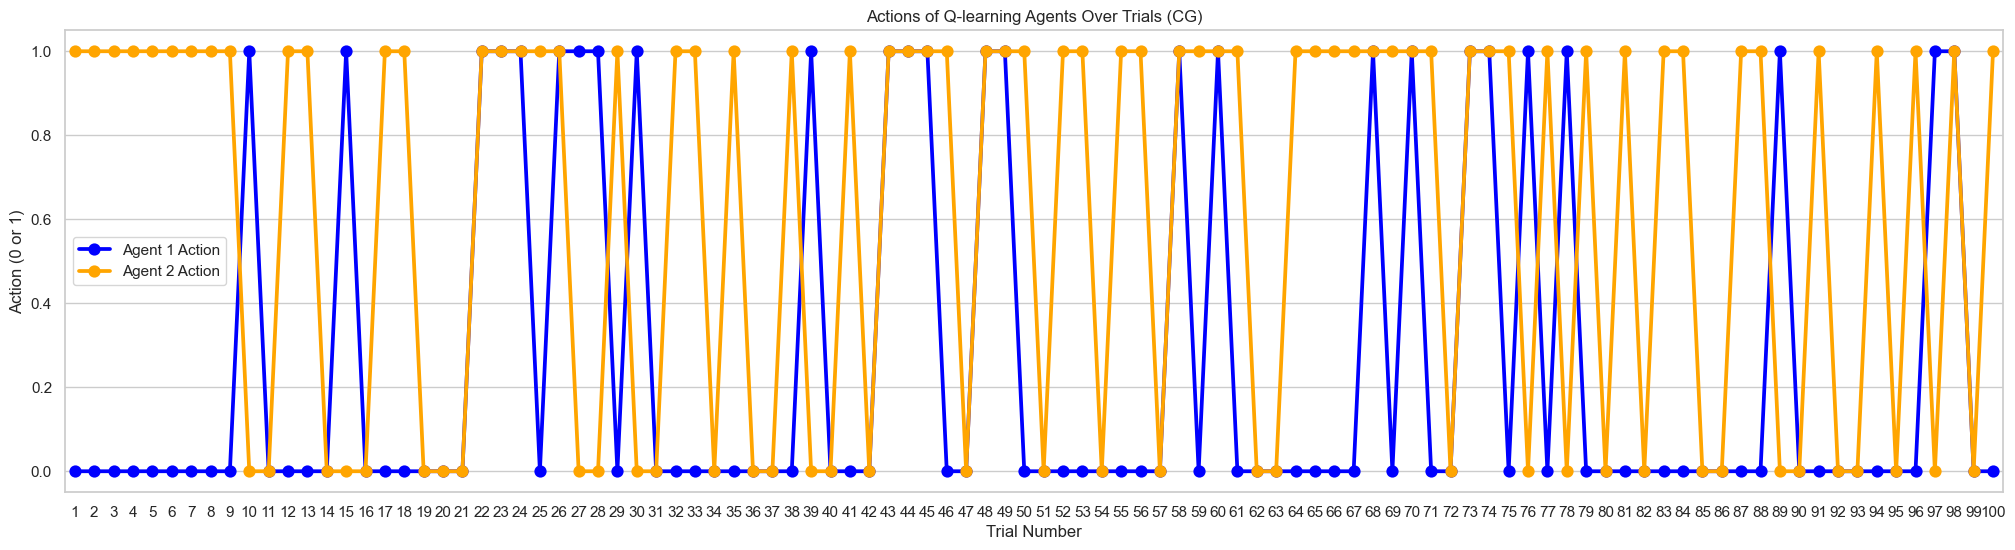

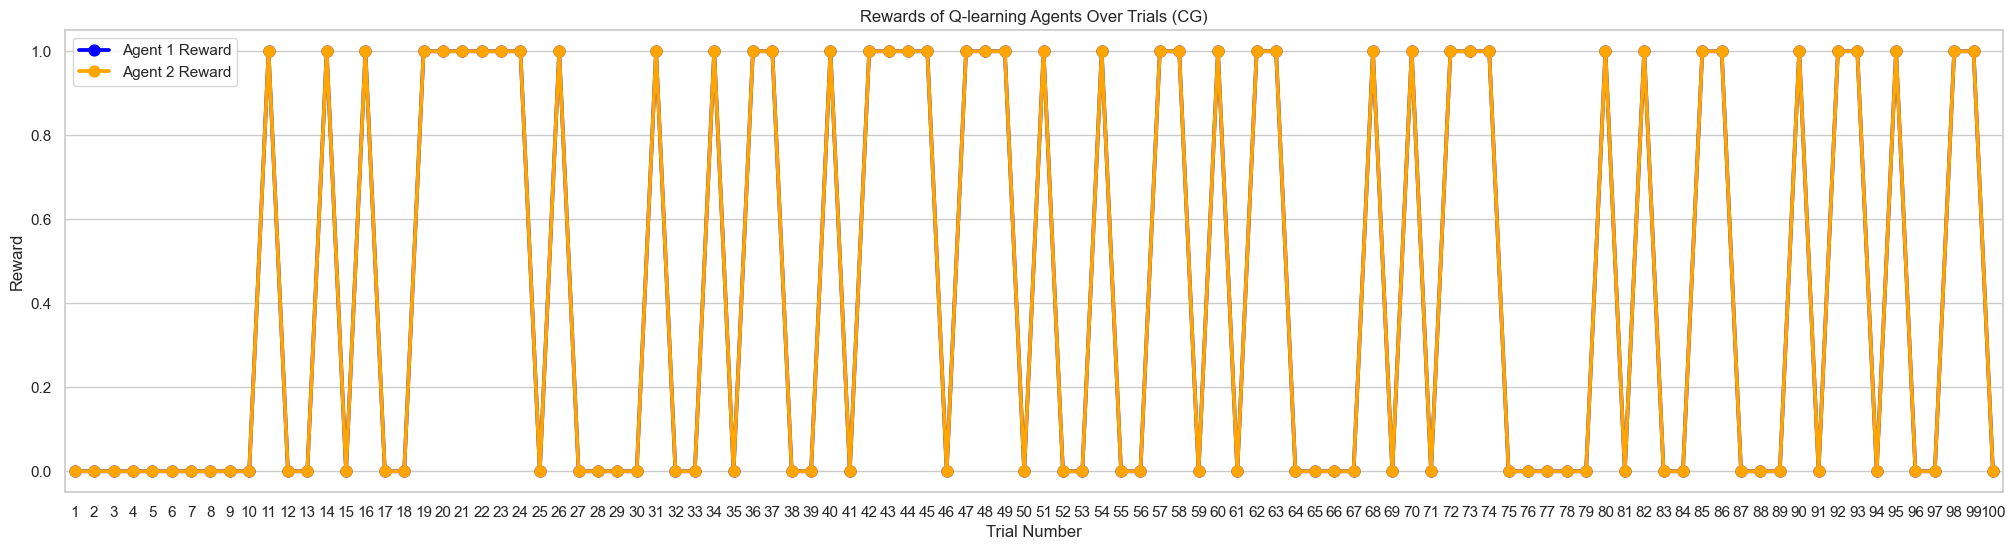

In [5]:
# We initialize two Q-learning agents with random Q-values and parameters. Q-values represent how much reward the agent expects from each action.
# Why random? It models initial uncertainty and allows us to see learning from scratch.

# Agent 1
x_init_q1 = np.random.randn(2)      # Start with random values for each possible action
phi_q1 = np.random.randn(2)         # Random softmax "temperature" and bias
theta_q1 = np.random.randn(1)       # Random learning rate (in log-odds space)

# Agent 2 (same logic)
x_init_q2 = np.random.randn(2)
phi_q2 = np.random.randn(2)
theta_q2 = np.random.randn(1)

# Create agent objects. Why specify the game and player_id? So each agent knows the rules and its own role.
agent1_QL = Agent(f_func=f_Qlearning, g_func=g_Qlearning, x_init=x_init_q1, phi=phi_q1, theta=theta_q1, game=payoff_matrix_CG, player_id=1)
agent2_QL = Agent(f_func=f_Qlearning, g_func=g_Qlearning, x_init=x_init_q2, phi=phi_q2, theta=theta_q2, game=payoff_matrix_CG, player_id=2)

# Simulate the agents playing together and collect the results.
history_QL = simulate_agents(agent1_QL, agent2_QL, n_trials=n_trials)

# Convert the results into a DataFrame for easier analysis and plotting.
history_df_QL = pd.DataFrame(history_QL)

# Plot the actions taken by both agents over time.
# Why? This visualization helps us see patterns—are they learning to coordinate? Are their choices random?
sns.set(style="whitegrid")
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent1_action", label="Agent 1 Action", color="blue")
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent2_action", label="Agent 2 Action", color="orange")
plt.title("Actions of Q-learning Agents Over Trials (CG)")
plt.xlabel("Trial Number")
plt.ylabel("Action (0 or 1)")
plt.legend()
plt.show()

# Similarly, plot the rewards earned by each agent over time.
# Why? To see if agents are learning to maximize their payoffs.
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent1_reward", label="Agent 1 Reward", color="blue")
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent2_reward", label="Agent 2 Reward", color="orange")
plt.title("Rewards of Q-learning Agents Over Trials (CG)")
plt.xlabel("Trial Number")  
plt.ylabel("Reward")
plt.legend()
plt.show()

Qu.1.a) Now do the same for the HaS.

Qu.1.b) Simulate games for different agents in the HaS and CG.

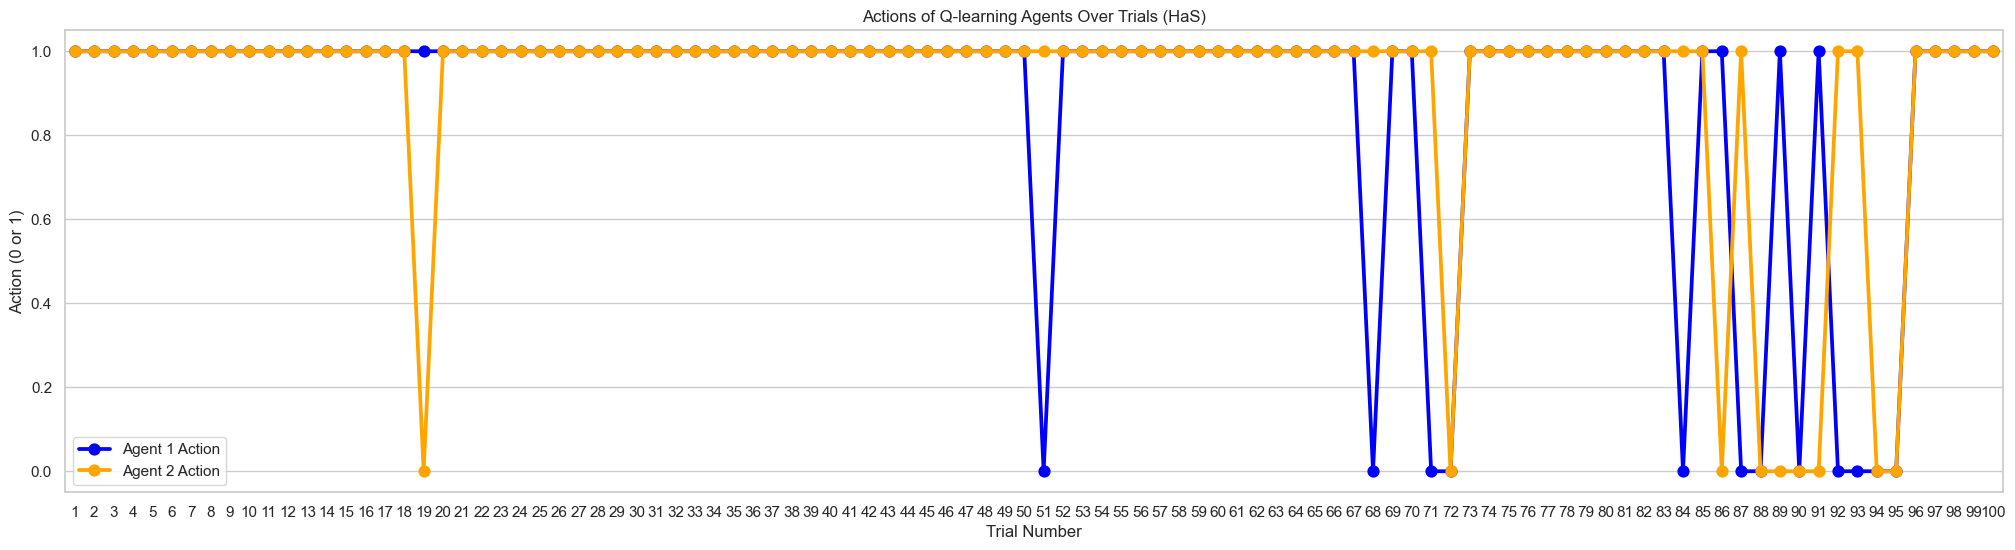

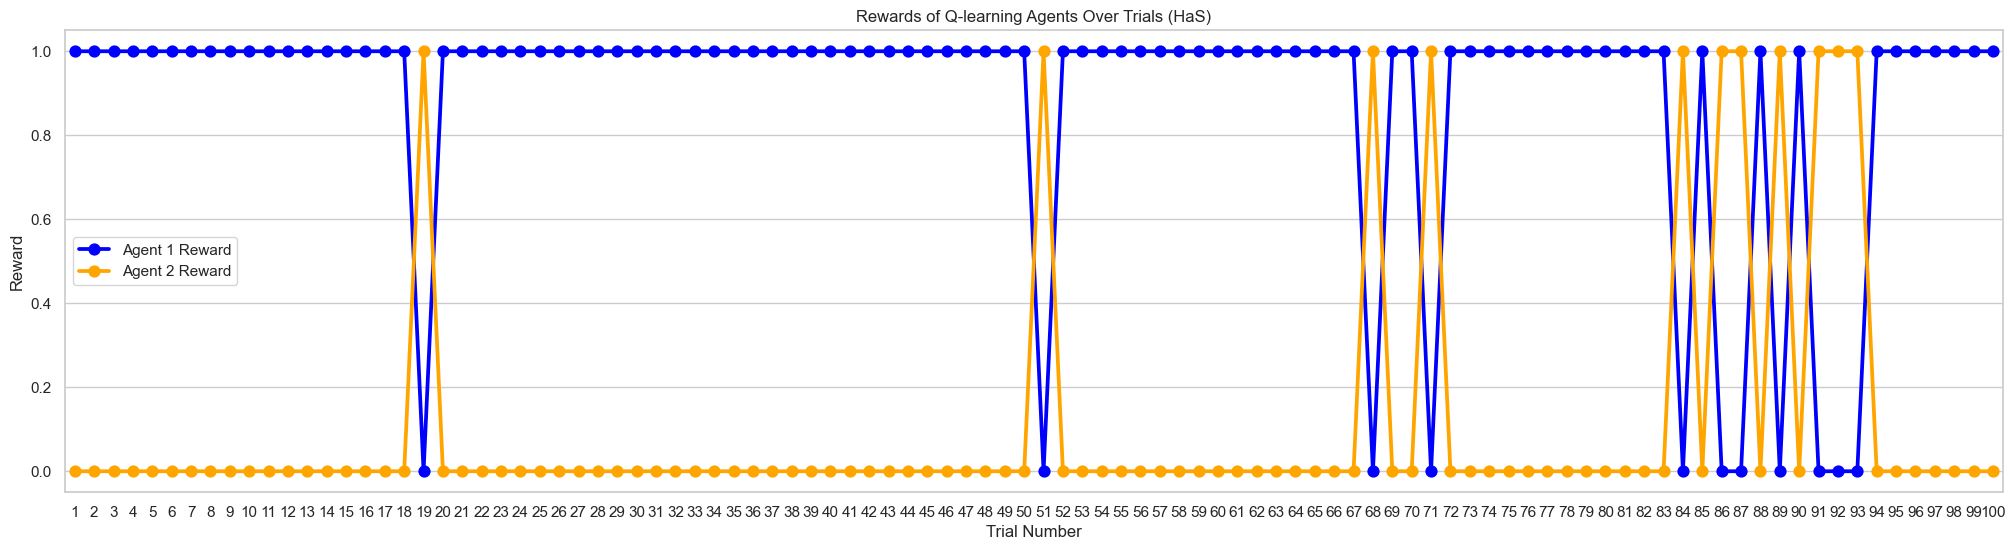

In [6]:
# Example initialization for Q-learning agents
x_init_q1 = np.random.randn(2)      # Q-values
phi_q1 = np.random.randn(2)         # [log beta, bias]
theta_q1 = np.random.randn(1)       # invsigmoid(alpha)

x_init_q2 = np.random.randn(2)      # Q-values
phi_q2 = np.random.randn(2)         # [log beta, bias]
theta_q2 = np.random.randn(1)       # invsigmoid(alpha)

agent1_QL = Agent(f_func=f_Qlearning, g_func=g_Qlearning, x_init=x_init_q1, phi=phi_q1, theta=theta_q1, game=payoff_matrix_HaS, player_id=1)
agent2_QL = Agent(f_func=f_Qlearning, g_func=g_Qlearning, x_init=x_init_q2, phi=phi_q2, theta=theta_q2, game=payoff_matrix_HaS, player_id=2)

# Simulate agents
history_QL = simulate_agents(agent1_QL, agent2_QL, n_trials=n_trials)

# Convert history to DataFrame for easier manipulation
history_df_QL = pd.DataFrame(history_QL)

# Plot agents actions on the same graph
sns.set(style="whitegrid")
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent1_action", label="Agent 1 Action", color="blue")
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent2_action", label="Agent 2 Action", color="orange")
plt.title("Actions of Q-learning Agents Over Trials (HaS)")
plt.xlabel("Trial Number")
plt.ylabel("Action (0 or 1)")
plt.legend()
plt.show()

# Plot agents rewards on the same graph
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent1_reward", label="Agent 1 Reward", color="blue")
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent2_reward", label="Agent 2 Reward", color="orange")
plt.title("Rewards of Q-learning Agents Over Trials (HaS)")
plt.xlabel("Trial Number")  
plt.ylabel("Reward")
plt.legend()
plt.show()

Now, let's make a QL agent play with a Mixed AA that switches between competitive and cooperative modes.

Game 1 trials: [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
Game 2 trials: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


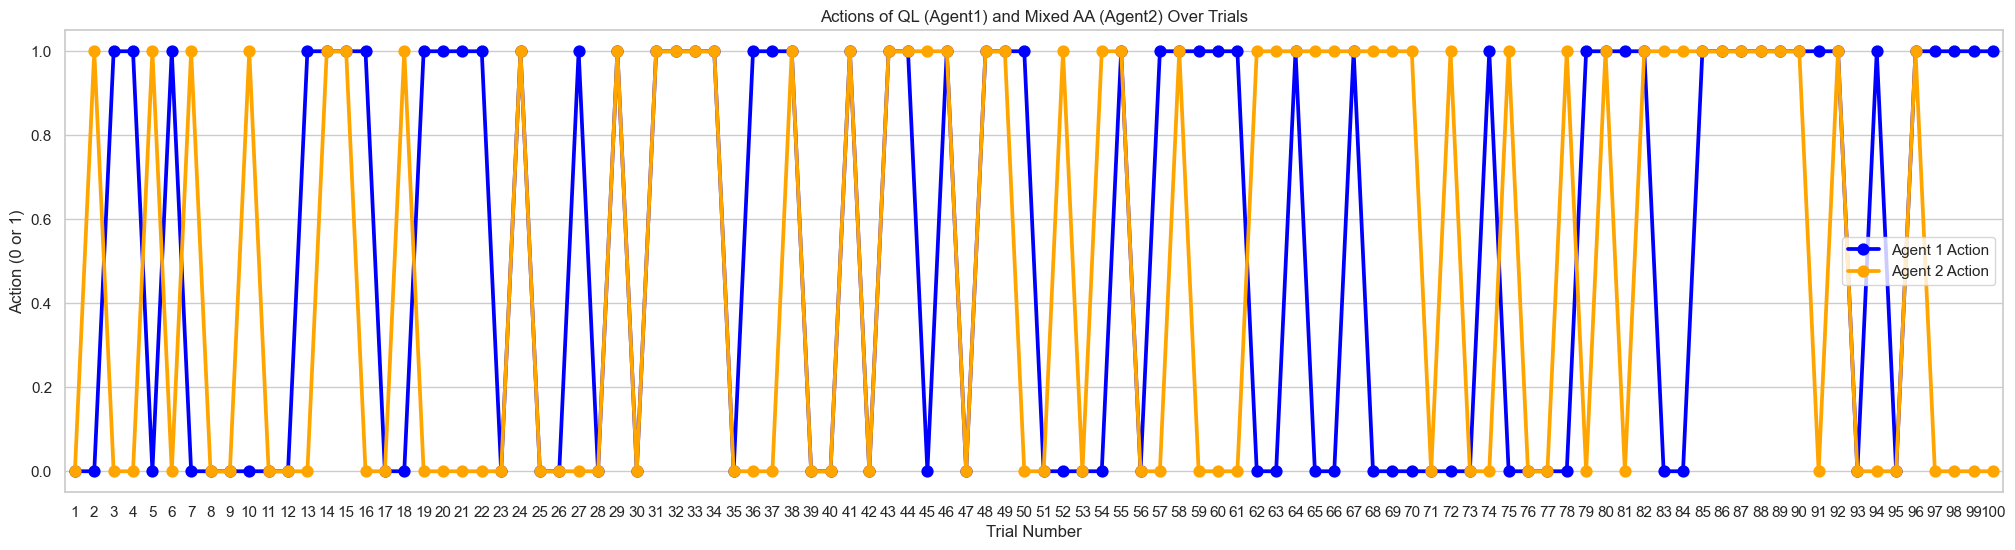

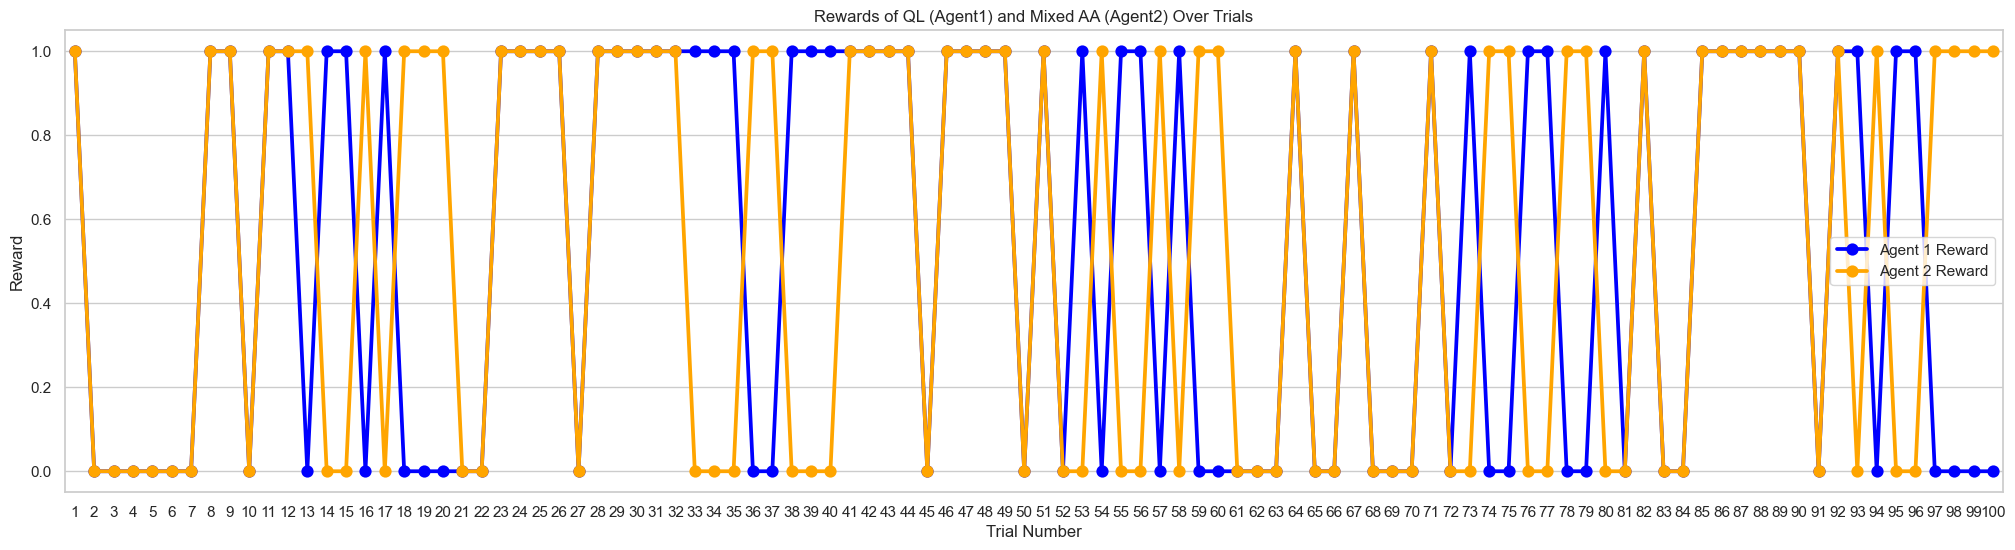

In [7]:
# We want to test how a QL agent interacts with a "Mixed Artificial Agent" that sometimes cooperates and sometimes competes.

# First, we create a schedule: which trials use Game 1 (cooperation) and which use Game 2 (competition)?
block_size = 20  # Each block of trials will be 20 rounds
game1_size_in_blocks = 12  # Of those, the first 12 are Game 1

game1_trials = np.zeros(n_trials, dtype=int)
for start in range(0, n_trials, block_size):
    # The first part of each block is "Game 1"
    game1_trials[start:start + game1_size_in_blocks] = 1
game2_trials = 1 - game1_trials  # The rest are "Game 2" (opposite)

print("Game 1 trials:", game1_trials)
print("Game 2 trials:", game2_trials)

# Initialize a QL agent (as above)
x_init_q1 = np.random.randn(2)
phi_q1 = np.random.randn(2)
theta_q1 = np.random.randn(1)
agent1_QL = Agent(f_func=f_Qlearning, g_func=g_Qlearning, x_init=x_init_q1, phi=phi_q1, theta=theta_q1, game=payoff_matrix_CG, player_id=1)

# Create a Mixed Artificial Agent that switches mode based on the current trial's game.
# This agent uses the outcome of recent rounds to decide whether to coordinate or compete.
agent2_Mixed_AA = MixedAgent(
    f_func=f_Mixed_AA,
    g_func=g_Mixed_AA,
    x_init=x_init_AA,
    phi=None,
    theta=None,
    game1=payoff_matrix_CG,
    game2=payoff_matrix_HaS,
    game1_trials=game1_trials,
    game2_trials=game2_trials,
    player_id=2
)

# Simulate their interaction.
history_QL_vs_Mixed_AA = simulate_agents(agent1_QL, agent2_Mixed_AA, n_trials=n_trials)
history_df_QL_vs_Mixed_AA = pd.DataFrame(history_QL_vs_Mixed_AA)

# Plot results as before.
sns.set(style="whitegrid")
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_QL_vs_Mixed_AA, x="trial_nb", y="agent1_action", label="Agent 1 Action", color="blue")
sns.pointplot(data=history_df_QL_vs_Mixed_AA, x="trial_nb", y="agent2_action", label="Agent 2 Action", color="orange")
plt.title("Actions of QL (Agent1) and Mixed AA (Agent2) Over Trials")
plt.xlabel("Trial Number")
plt.ylabel("Action (0 or 1)")
plt.legend()
plt.show()

plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_QL_vs_Mixed_AA, x="trial_nb", y="agent1_reward", label="Agent 1 Reward", color="blue")
sns.pointplot(data=history_df_QL_vs_Mixed_AA, x="trial_nb", y="agent2_reward", label="Agent 2 Reward", color="orange")
plt.title("Rewards of QL (Agent1) and Mixed AA (Agent2) Over Trials")
plt.xlabel("Trial Number")  
plt.ylabel("Reward")
plt.legend()
plt.show()

Qu.2.a) What can you observe for the rewards of the different agents? 

Qu.2.b) Simulate a game between a MIIL agent vs a Mixed AA.

Qu.2.c) What can you observe for the rewards of the different agents?

Qu.2.d) What happens if you simulate longer games with more trials? 

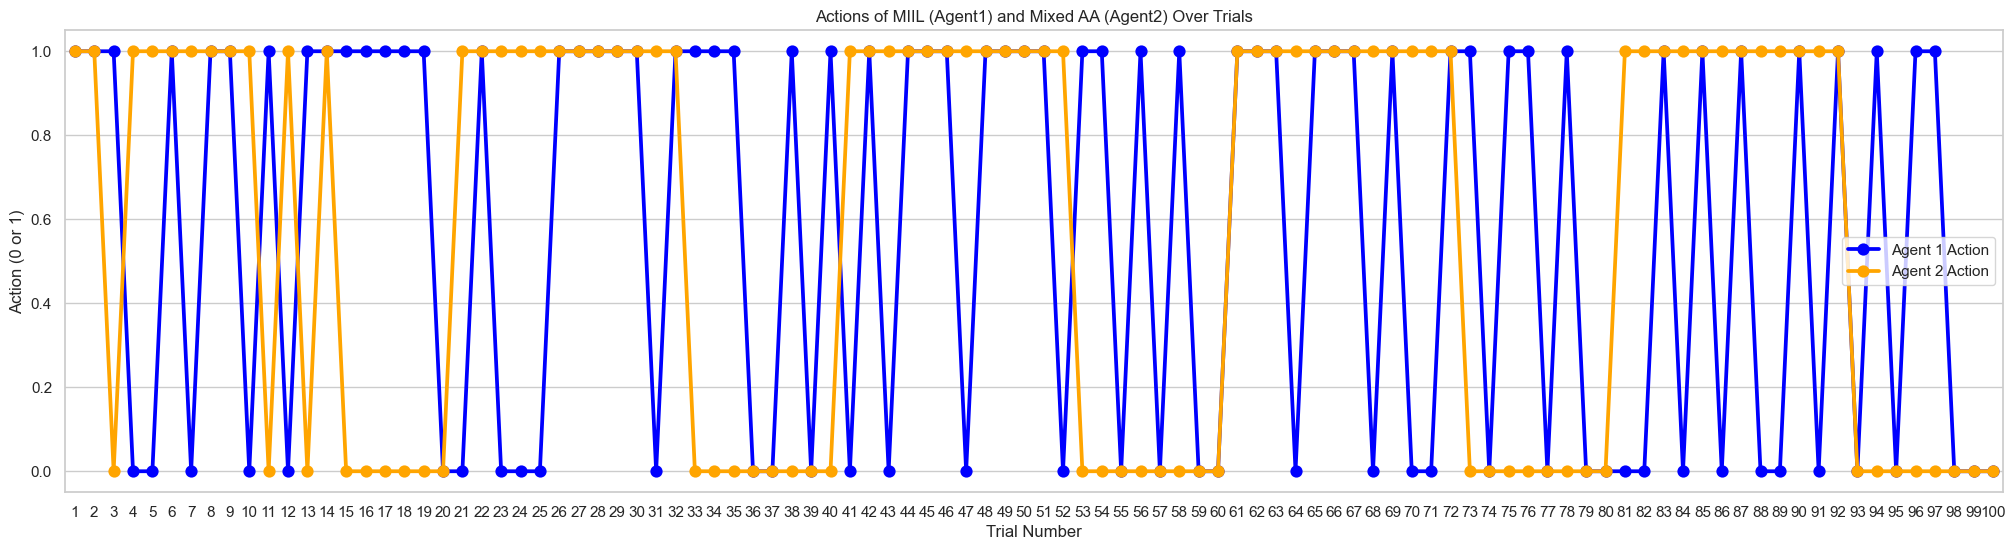

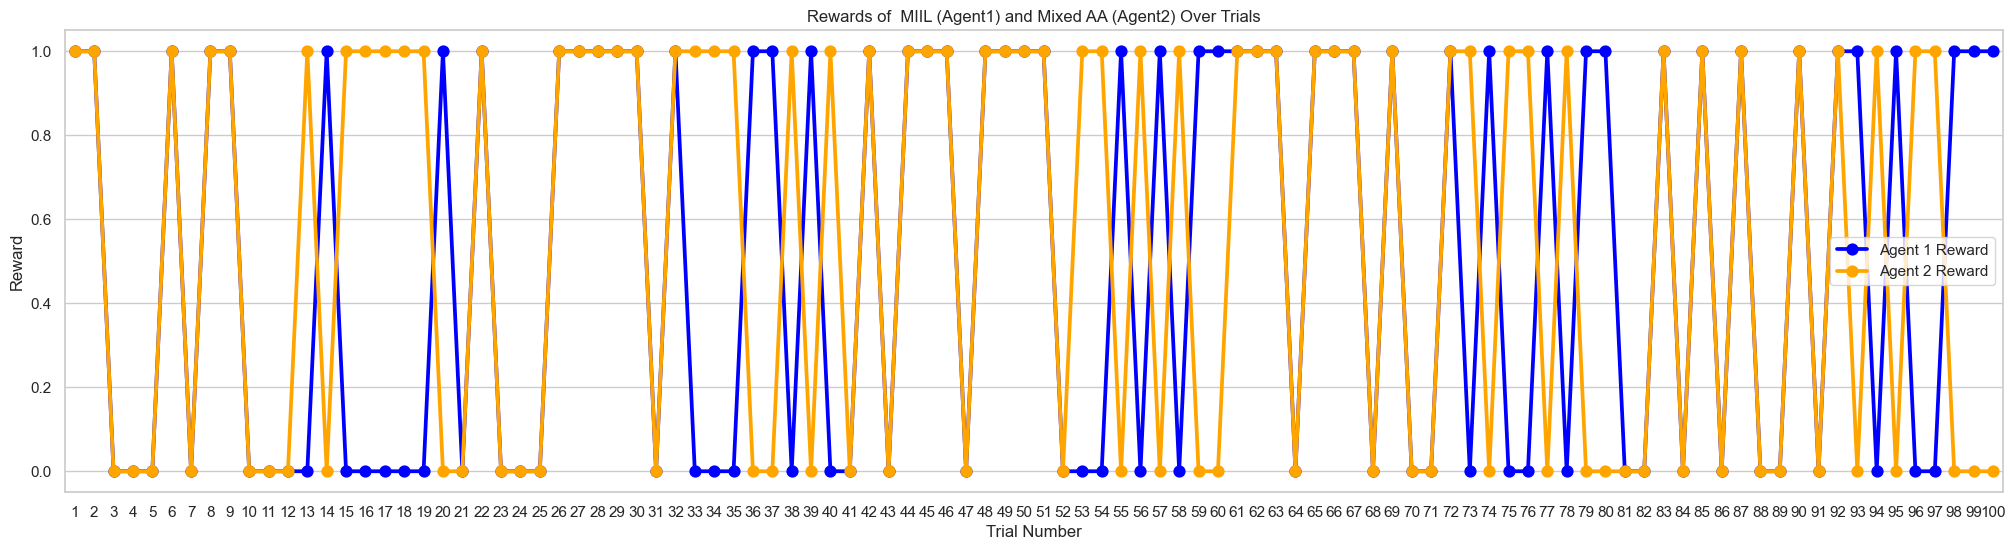

In [8]:
# Example initialization for MIIL agent
x_init_miil = np.random.randn(3)   # beliefs for game1, game2, and mixing weight
phi_miil = np.random.randn(2)      # [log beta, bias]
theta_miil = np.random.randn(5)    # [inv_eta, inv_lambda, log beta]

agent1_MIIL = MixedAgent(f_func=f_MIIL, g_func=g_MIIL, x_init=x_init_miil, phi=phi_miil, theta=theta_miil,
                    game1=payoff_matrix_CG, game2=payoff_matrix_HaS, game1_trials=np.ones(n_trials, dtype=bool), game2_trials=np.zeros(n_trials, dtype=bool), player_id=1)
agent2_Mixed_AA = MixedAgent(f_func=f_Mixed_AA, g_func=g_Mixed_AA, x_init=x_init_AA, phi=None, theta=None,
                        game1=payoff_matrix_CG, game2=payoff_matrix_HaS, game1_trials=game1_trials, game2_trials=game2_trials, player_id=2)

# Simulate agents
history_MIIL_vs_Mixed_AA = simulate_agents(agent1_MIIL, agent2_Mixed_AA, n_trials=n_trials)

# Convert history to DataFrame for easier manipulation
history_df_MIIL_vs_Mixed_AA = pd.DataFrame(history_MIIL_vs_Mixed_AA)

# Plot agents actions on the same graph
sns.set(style="whitegrid")
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_MIIL_vs_Mixed_AA, x="trial_nb", y="agent1_action", label="Agent 1 Action", color="blue")
sns.pointplot(data=history_df_MIIL_vs_Mixed_AA, x="trial_nb", y="agent2_action", label="Agent 2 Action", color="orange")
plt.title("Actions of MIIL (Agent1) and Mixed AA (Agent2) Over Trials")
plt.xlabel("Trial Number")
plt.ylabel("Action (0 or 1)")
plt.legend()
plt.show()

# Plot agents rewards on the same graph
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_MIIL_vs_Mixed_AA, x="trial_nb", y="agent1_reward", label="Agent 1 Reward", color="blue")
sns.pointplot(data=history_df_MIIL_vs_Mixed_AA, x="trial_nb", y="agent2_reward", label="Agent 2 Reward", color="orange")
plt.title("Rewards of  MIIL (Agent1) and Mixed AA (Agent2) Over Trials")
plt.xlabel("Trial Number")  
plt.ylabel("Reward")
plt.legend()
plt.show()

Let's now run multiple game simulations and look at the average reward for each model against any other given model. We want to see if there is an advantage for any model against the others.

In [9]:
nb_sim = 100          # Number of full simulations to run (to get robust statistics, not just one random run)
n_trials = 300        # Number of trials (rounds) in each simulation. Why? Longer games allow more learning and pattern observation.

# We want to simulate agents that switch between two types of games (e.g. cooperative and competitive).
# To do this, we need to determine for each trial which game is being played.

block_size = 20            # Each "block" of trials consists of 20 consecutive rounds.
game1_size_in_blocks = 12  # In each block, the first 12 trials are Game 1 (e.g., cooperation), the remainder are Game 2.

# Create an array to flag which trials are Game 1 (1) or not (0).
game1_trials = np.zeros(n_trials, dtype=int)  # Start with all trials as Game 2 (0).
for start in range(0, n_trials, block_size):
    # For each block, mark the first 'game1_size_in_blocks' trials as Game 1 (set to 1).
    # Why? This simulates a structured environment where agents face different games in predictable chunks.
    game1_trials[start:start + game1_size_in_blocks] = 1

# Game 2 is just the complement of Game 1 (if not Game 1, it's Game 2).
game2_trials = 1 - game1_trials

# Print arrays to visually verify game switching schedule (helps with debugging and understanding).
print("Game 1 trials:", game1_trials)
print("Game 2 trials:", game2_trials)

full_sims_hist = []  # This will store the results (histories) of all simulations for later analysis.

Game 1 trials: [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0]
Game 2 trials: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1

Qu.3.a) Fill the following block of code to run nb_sim simulations of different agents playing against each others.

Qu.3.b) Is there any advantage of using one model vs another? Is ToM always useful? How come? 

In [10]:
for sim in range(nb_sim):    
    # For each simulation, we randomly initialize the agent parameters.
    # Why? This ensures that each simulation run is independent and explores different starting conditions.

    # Q-learning agent initialization
    x_init_q = np.random.randn(2)      # Q-values: initial guesses for each possible action's value
    phi_q = np.random.randn(2)         # Parameters for action selection: [log beta, bias]
    theta_q = np.random.randn(1)       # Learning rate, in transformed (logit) space

    # Fictitious learner initialization
    x_init_FP = np.random.randn(2)     # Q-values for both actions
    phi_FP = np.random.randn(2)        # Softmax and bias
    theta_FP = np.random.randn(1)      # Learning rate parameter

    # Influence learner initialization
    x_init_inf = np.random.randn(1)    # Belief about opponent's action (log-odds for o=1)
    phi_inf = np.random.randn(2)       # Action selection parameters
    theta_inf = np.random.randn(3)     # Learning and influence parameters

    # MIIL agent initialization (Mixed-Intentions Influence Learning)
    x_init_miil = np.random.randn(3)   # Beliefs for [Game 1, Game 2, game identity/mixing]
    phi_miil = np.random.randn(2)      # Action selection (softmax and bias)
    theta_miil = np.random.randn(5)    # Belief & influence learning rates plus decision params

    # --- Initialize agent objects for player 1 ---
    agent1_QL = Agent(
        f_func=f_Qlearning, g_func=g_Qlearning, 
        x_init=x_init_q, phi=phi_q, theta=theta_q, 
        game=payoff_matrix_CG, player_id=1
    )
    agent1_FP = Agent(
        f_func=f_fictitious_learner, g_func=g_fictitious_learner, 
        x_init=x_init_FP, phi=phi_FP, theta=theta_FP, 
        game=payoff_matrix_CG, player_id=1
    )
    agent1_Inf = Agent(
        f_func=f_influence_learner, g_func=g_influence_learner, 
        x_init=x_init_inf, phi=phi_inf, theta=theta_inf, 
        game=payoff_matrix_CG, player_id=1
    )
    agent1_MIIL = MixedAgent(
        f_func=f_MIIL, g_func=g_MIIL, 
        x_init=x_init_miil, phi=phi_miil, theta=theta_miil,
        game1=payoff_matrix_CG, game2=payoff_matrix_HaS, 
        game1_trials=np.ones(n_trials, dtype=bool),   # Always in Game 1 context here
        game2_trials=np.zeros(n_trials, dtype=bool),  # Never in Game 2
        player_id=1
    )

    # --- Initialize agent objects for player 2 ---
    agent2_QL = Agent(
        f_func=f_Qlearning, g_func=g_Qlearning, 
        x_init=x_init_q, phi=phi_q, theta=theta_q, 
        game=payoff_matrix_CG, player_id=2
    )
    agent2_FP = Agent(
        f_func=f_fictitious_learner, g_func=g_fictitious_learner, 
        x_init=x_init_q, phi=phi_q, theta=theta_q, 
        game=payoff_matrix_CG, player_id=2
    )
    agent2_Inf = Agent(
        f_func=f_influence_learner, g_func=g_influence_learner, 
        x_init=x_init_inf, phi=phi_inf, theta=theta_inf, 
        game=payoff_matrix_CG, player_id=2
    )
    agent2_Mixed_AA = MixedAgent(
        f_func=f_Mixed_AA, g_func=g_Mixed_AA, 
        x_init=x_init_AA, phi=None, theta=None,
        game1=payoff_matrix_CG, game2=payoff_matrix_HaS,
        game1_trials=game1_trials, game2_trials=game2_trials,
        player_id=2
    )

    # Arrange agents into lists with labels
    # Why? This structure allows us to automate all model-vs-model matchups in nested loops.
    agents1_dict_list = [
        {'model': 'QL', 'agent': agent1_QL},
        {'model': 'FP', 'agent': agent1_FP},
        {'model': 'Inf', 'agent': agent1_Inf},
        {'model': 'MIIL', 'agent': agent1_MIIL}
    ]
    agents2_dict_list = [
        {'model': 'QL', 'agent': agent2_QL},
        {'model': 'FP', 'agent': agent2_FP},
        {'model': 'Inf', 'agent': agent2_Inf},
        {'model': 'Mixed_AA', 'agent': agent2_Mixed_AA}
    ]

    # --- Run all possible pairings of agent1 vs agent2 ---
    for entry1 in agents1_dict_list:
        for entry2 in agents2_dict_list:
            mod1 = entry1['model']
            mod2 = entry2['model']
            agent1 = entry1['agent']
            agent2 = entry2['agent']

            # Reset agents' histories and internal states before each match-up
            # Why? Ensures each match starts fresh, unaffected by previous matches.
            agent1.history = []
            agent2.history = []
            agent1.x = agent1.x_init
            agent2.x = agent2.x_init

            # Simulate the game: both agents interact and learn over n_trials
            history = simulate_agents(agent1, agent2, n_trials)

            # Store results for later analysis
            # Including: which simulation, which models, both agent objects, the full game history, and total reward for agent1
            full_sims_hist.append({
                'sim_id': sim,
                'model': mod1,
                'other_agent': mod2,
                'agent1': agent1,
                'agent2': agent2,
                'history': history,
                'total_reward': sum([trial_data["agent1_reward"] for trial_data in history])
            })

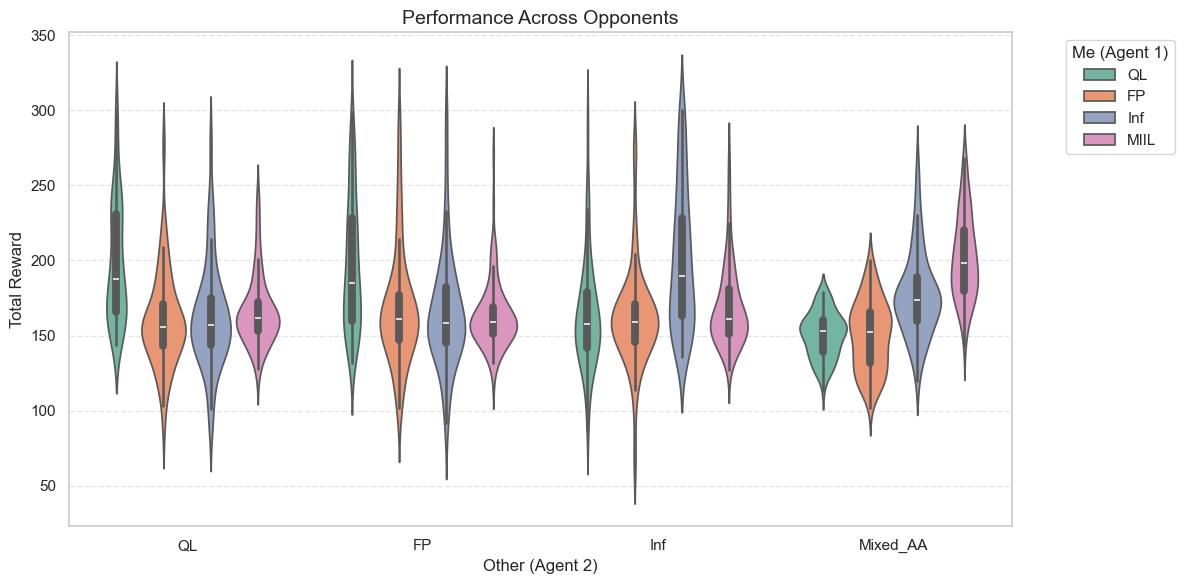

In [11]:
# Plot the results of the simulations

# Conversion to dataframes
df_models = pd.DataFrame(full_sims_hist)

# Violin plots
plt.figure(figsize=(12, 6))
sns.violinplot(x='other_agent', y='total_reward', hue='model', data=df_models, split=False, palette='Set2')

# Style
plt.title('Performance Across Opponents', fontsize=14)
plt.ylabel('Total Reward')
plt.xlabel('Other (Agent 2)')
plt.legend(title='Me (Agent 1)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# Model Fitting

## Why Do We Fit Models?
If we consider a set of data drawn from an unknown process, for example the consecutive choices of a participant in a game, the question that we want to address is “what is the process that generated these data?”. Computational models are propositions of candidate processes that could have generated such data, summed up into mathematical equations. To make it simple, you can see these mathematical equations, or computational models, as constituted by “bricks”. These bricks are more or less easily interpretable and they modulate the behaviour predicted by the model. Our aim is to identify the best fitting model to our data, because its core mechanisms, or bricks, are good candidate mechanisms that could explain the data generation process. And to do so, we have to find the best learning parameters ($\theta$ and $\phi$) of each model for our data.

<img src="images/Model_blocks.jpg" alt="Models are built with 'blocks'" width="1000"/>

In summary:
- Computational models help explain behavior in social games.
- Parameters (e.g., learning rates, belief depths) are latent and must be inferred.
- **Model fitting** is the process of estimating these unobserved parameters from observed behavior.


## General Approaches to Model Fitting

Different approaches exist to fit models. The 3 main ones are:

### Maximum Likelihood Estimation (MLE) – “Let the Data Speak”

#### Core Idea:
- Finds the model that makes the observed data most likely, without considering anything else (like prior beliefs).
- Estimates parameters that **maximize the likelihood** of observed data, i.e. P(data | parameters).

NB: most often, we work with the Log-Likelihood (LL) rather than the likelihood for (computational) practical reasons. 

#### Example:
You flip a coin 10 times and get 7 heads. You want to estimate the probability of heads, say θ.

MLE asks: “Which value of θ makes it most likely that you would get 7 heads out of 10?”

Answer: θ = 0.7

The estimate will be a single value, based purely on the data.

### Maximum a Posteriori (MAP) – “Let the Data Speak, but Consider Your Beliefs Too”

#### Core Idea:
- Like MLE, but you also include prior beliefs about what values are likely, using Bayes’ Rule.
- It incorporates **prior beliefs** about parameters.
- MAP = argmax [ likelihood × prior ]

Reminder of Bayes' Rule:
$$
posterior = \frac{likelihood * prior}{evidence}
$$

This can be illustrated as follows:

<img src="images/Bayes_inference.jpg" alt="Bayes inference rule" width="550"/>

For the observed data $x$ and model parameters $\theta$, this gives:
$$
p(\theta|x) = \frac{p(x|\theta)*p(\theta)}{p(x)}
$$

#### Example:
With the same example as previously, suppose you believe the coin is fair, i.e., θ is probably close to 0.5, before seeing any flips.

MAP combines:

- Likelihood (what the data says)
- Prior (what you believed before)

MAP asks:

“Given the data and my prior belief, which value of θ is most likely?”

Depending on the strength of your prior beliefs, the answer might now be, for example: θ = 0.65 (slight prior belief of coin fairness, which slightly pulls θ toward 0.5 compared to previously with MLE).

The estimate will be, again, a single value, based not only on the data but also on your prior beliefs.

### Bayesian Inference – “Use the Whole Distribution”

#### Core Idea:
- Don’t just pick the most likely value—keep the entire distribution of possible values, to represent uncertainty.
- Estimates a **posterior distribution** over parameters.
- Supports uncertainty quantification and model comparison.

#### Example:
Instead of saying “θ = 0.7” or “θ = 0.65”, Bayesian inference says:
“Given my data and prior, here’s the full posterior distribution over θ.”

This gives you:
- A most likely value (~max of the distribution)
- A range of plausible values (~distribution values within a standard deviation centered around the max)
- A sense of uncertainty (~standard deviation)

The estimate will be a distribution, and not a single value anymore as in MLE and MAP.

We will focus today on *Bayesian Inference*.

### From Bayesian Inference to (Stochastic) Variational Inference
- Exact inference is often intractable.
- **Variational Inference (VI)** approximates the true posterior with a simpler distribution.
- The goal is to optimize this distribution to be close to the real posterior.
- Stochastic Variational Inference (SVI) uses stochastic gradient descent (e.g., Adam).
- Optimizes the **Evidence Lower Bound (ELBO)** (see https://pyro.ai/examples/svi_part_i.html#ELBO for more details).
- Implemented in libraries like **Pyro**, **NumPyro**, **TensorFlow Probability** (Python) or **VBA-toolbox** (Matlab).

Let's now fit our models to some of our generated data.

In [12]:
# Initialize Pyro models and guides
# Why? In probabilistic programming, a 'model' defines how data is generated (including randomness and hidden variables),
# while a 'guide' is an approximation for inference (how we guess hidden variables from observed data).
# Here, we pair each learning model with its corresponding guide for use in inference tasks (e.g., parameter fitting).
pyro_models = {
    "QL": (q_learning_pyro_model, guide_Qlearn),
    "FP": (fictitious_learner_pyro_model, guide_FPlayer),
    "Inf": (influence_learning_pyro_model, guide_influence_learning),
    "MIIL": (MIIL_pyro_model, guide_MIIL)
}

# Collect unique model names for easy reference elsewhere in the code.
# Why? This makes it simple to iterate over all available models (e.g., for running inference, simulations, or comparisons).
all_models = set(pyro_models.keys())

Qu.4.a) Fill the following code cell to fit the 4 models defined in the dictionary "pyro_models" to your data.

Qu.4.b) Try different values for n_steps, tolerance and patience. What happens? What are these parameters used for? 

Fitting model QL
[0] ELBO: -98.30, Best: -98.30


c:\Users\tnong\Desktop\These\Prog_Courses\CIX_SummerSchool\CIX_course_Modelling_ToM_functions.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-slope * (x - center)))


Early stopping at step 80: no improvement in 50 steps.
Best parameters found:{'alpha_loc': tensor(-0.0093), 'beta_loc': tensor(0.0088), 'bias_loc': tensor(-0.0092)}


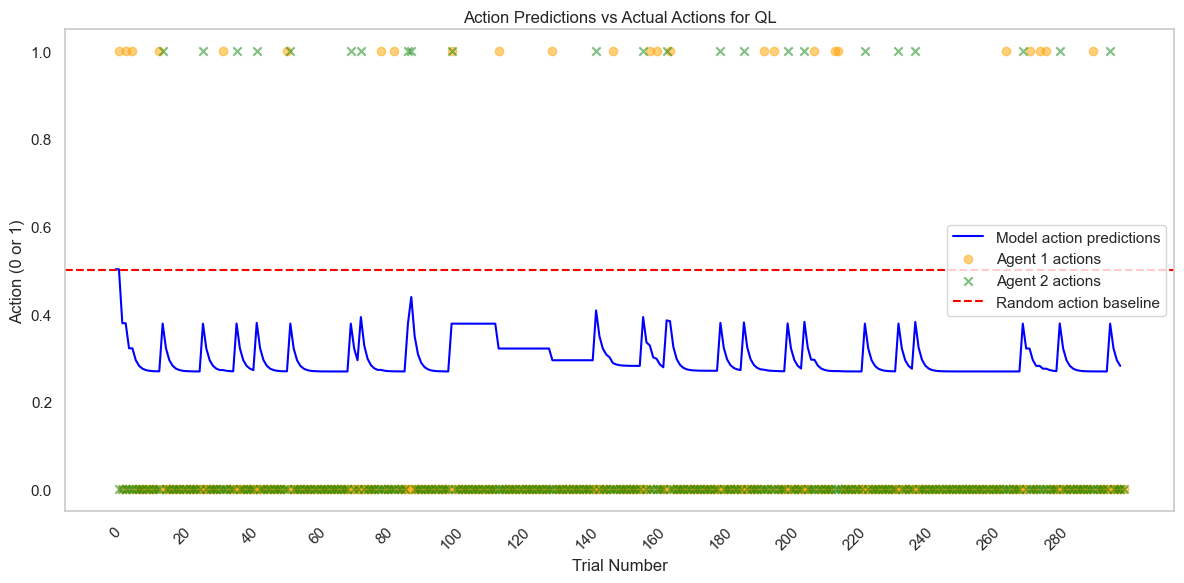

Model QL accuracy: 0.92
Model QL balanced accuracy: 0.52
Model QL log likelihood: -127.73
Fitting model FP
[0] ELBO: -313.92, Best: -313.92
[100] ELBO: -366.05, Best: -85.82
Early stopping at step 147: no improvement in 50 steps.
Best parameters found:{'alpha_loc': tensor(-0.0023), 'beta_loc': tensor(-0.0084), 'bias_loc': tensor(0.0139)}


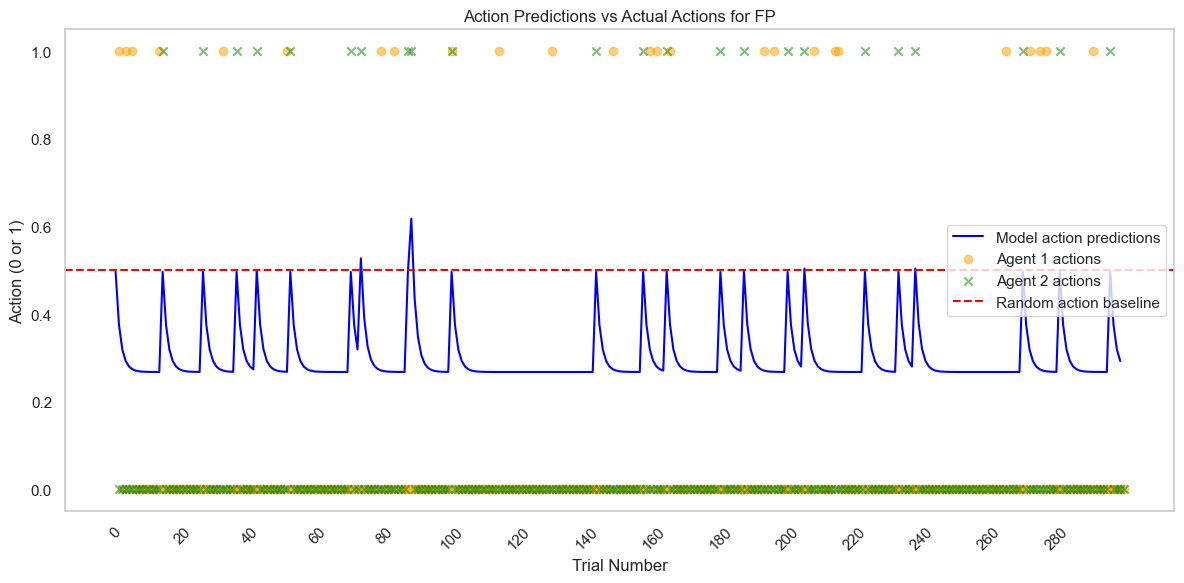

Model FP accuracy: 0.90
Model FP balanced accuracy: 0.49
Model FP log likelihood: -131.11
Fitting model Inf
[0] ELBO: -111.07, Best: -111.07
Early stopping at step 94: no improvement in 50 steps.
Best parameters found:{'eta_loc': tensor(0.0034), 'lambd_loc': tensor(0.0041), 'beta_opp_loc': tensor(-0.0003), 'beta_loc': tensor(0.0023), 'bias_loc': tensor(-0.0037)}


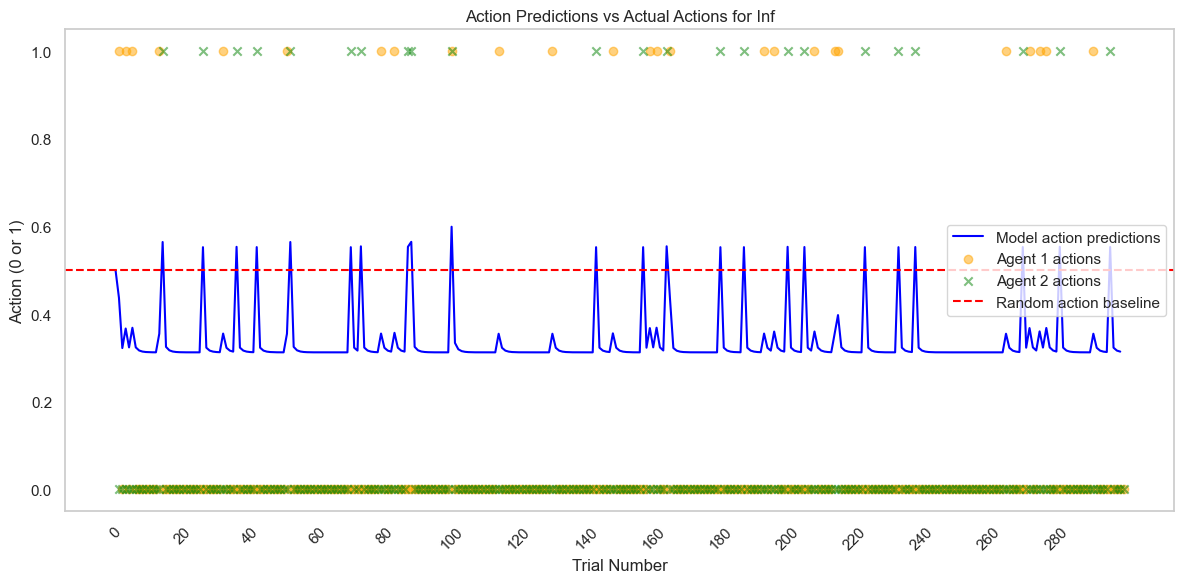

Model Inf accuracy: 0.85
Model Inf balanced accuracy: 0.48
Model Inf log likelihood: -143.27
Fitting model MIIL
[0] ELBO: -200.55, Best: -200.55
Early stopping at step 53: no improvement in 50 steps.
Best parameters found:{'eta_loc': tensor(0.0007), 'lambd_loc': tensor(-0.0016), 'beta_opp_loc': tensor(-0.0009), 'invprec_loc': tensor(-0.0025), 'bias_loc': tensor(-0.0012), 'beta1_loc': tensor(-0.0001), 'beta2_loc': tensor(-0.0024)}


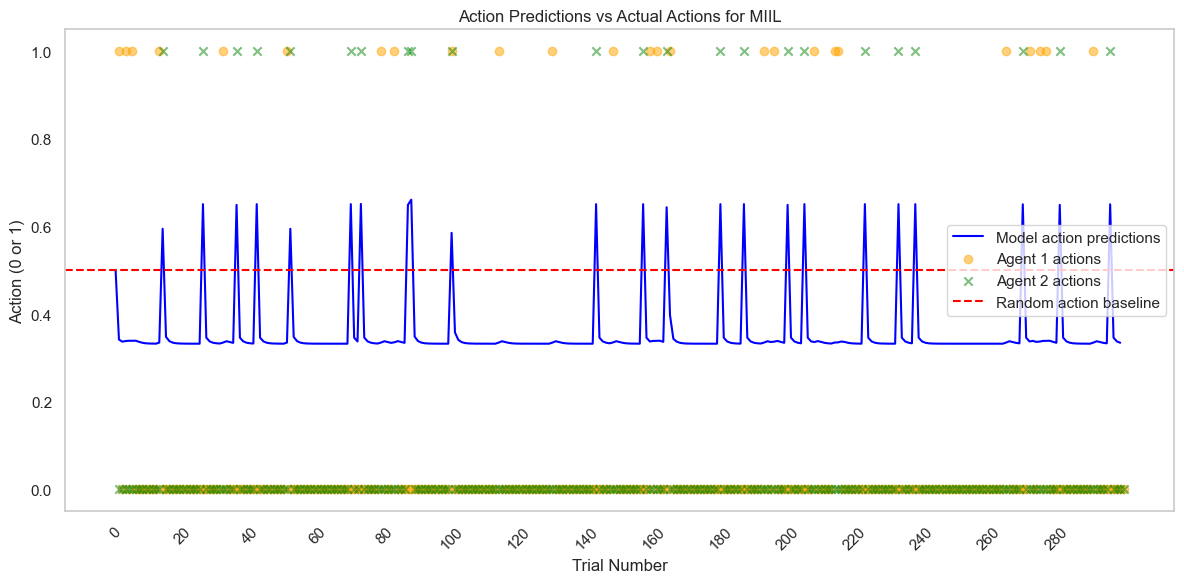

Model MIIL accuracy: 0.85
Model MIIL balanced accuracy: 0.48
Model MIIL log likelihood: -152.39


In [13]:
k = 0 # choose the index of the data in full_sims_hist that you want to fit 

# Load the results of the selected simulation into a DataFrame for easier access and plotting
sim_hist = pd.DataFrame(full_sims_hist[k]['history'])

# Prepare the observed data needed for model fitting (actions and rewards for agent 1)
data = {
    'agent1_action': sim_hist['agent1_action'],
    'agent2_action': sim_hist['agent2_action'],
    'agent1_reward': sim_hist['agent1_reward']
}

# Loop through each model you want to fit (as defined in pyro_models)
for fitted_model_name, (model_fn, guide_fn) in pyro_models.items():
    print((f"Fitting model {fitted_model_name}"))

    # Prepare model-specific input arguments
    # Why? Each model expects its own inputs: e.g., game matrices, player number, belief vector size.
    if(fitted_model_name=="MIIL"):
        in_dict = {'game1': payoff_matrix_CG, 'game2': payoff_matrix_HaS, 'player': 1, 'dim_x': 3}
    elif(fitted_model_name=="Inf"):
        in_dict = {'game': payoff_matrix_CG, 'player': 1, 'dim_x': 1}
    else:
        in_dict = {'dim_x': 2}

    # --- Fit the model to the data using probabilistic inference ---
    # This step estimates the model parameters that best explain the observed actions and rewards.
    res = fit_model(data = data, model_fn = model_fn, guide_fn = guide_fn, in_dict = in_dict, n_steps=500, tolerance=1e-4, verbose=True, patience=50)

    # --- Evaluate the fit: how well does the model capture the observed behavior? ---
    goodness_of_fit = compute_goodness_of_fit(res, data)
    
    # --- Visualize the results ---
    # Plot how well the model's predictions align with the actual (simulated) data
    plot_fit_results(res, sim_hist, fitted_model_name, n_trials)

    # --- Report summary metrics for this model fit ---
    # Accuracy: percentage of actions the model predicts correctly
    accuracy = goodness_of_fit['accuracy']
    print(f"Model {fitted_model_name} accuracy: {accuracy:.2f}")

    # Balanced accuracy: accounts for class imbalance between actions
    balanced_accuracy = goodness_of_fit['balanced_accuracy']
    print(f"Model {fitted_model_name} balanced accuracy: {balanced_accuracy:.2f}")

    # Log likelihood: how probable the observed data is under the fitted model (higher is better)
    log_likelihood = goodness_of_fit['log_likelihood']
    print(f"Model {fitted_model_name} log likelihood: {log_likelihood:.2f}")

    



Qu.5.a) We have fitted different models to some of our simulated data. Which model should we choose to explain our data? Based on what criterion? 

Qu.5.b) Can you find some limits to using accuracy, balanced accuracy, and log-likelihood to compare different models?

## Model Comparison 
### Why Compare Models?
- Multiple models may explain the same behavior.
- **Model comparison** helps us decide which model best accounts for the data.

### Key Metrics
- **Log Likelihood** (LL)
$$
LL = ln(P(x|\theta,\phi))
$$
- **AIC** (Akaike Information Criterion) / **BIC** (Bayesian Information Criterion): penalized likelihood criteria
$$
AIC = -2*(LL - n_{params})
$$

$$
BIC = -2*(LL - \frac{n_{params}*ln(n_{trials})}{2})
$$

- **ELBO** (evidence lower bound): 
$$
ELBO=(Reconstruction accuracy)−(Regularization penalty)
$$
Maximizing ELBO improves the fit to the data (see https://pyro.ai/examples/svi_part_i.html#ELBO).

### Fixed vs. Random Effects for model comparison
- Fixed-effect analysis (FFX): assumes that a single model best describes all subjects (although subjects might still differ between each other with different model parameters).

<img src="images/ffxbms.jpg" alt="FFX BMS" width="200"/>

The same **model $m$** generated the **data $y_k$** of each **subject $k$** (possibly with different **model parameters $\theta$ and $\phi$**).

To do a FFX model comparison:
1. Choose your (log-) model evidence, i.e. criterion of comparison (e.g. AIC, BIC, ELBO...).
2. For each subject, fit each model and get the corresponding model evidence (AIC, BIC, ELBO...).
3. Sum or average the evidences over subjects for each model.
4. Select the lowest (or highest, depending on the chosen criterion) model evidence to select the best model for the group.

- Random-effect analysis (RFX): assumes that your group is drawn from a population where each model is present in different proportions, with an unknown population distribution (described in terms of model frequencies/proportions)

<img src="images/rfxbms.jpg" alt="RFX BMS" width="200"/>

Your population has a **model frequency profile $r$** (repartition of the models in the population) from which each **subject $k$** has a given **model $m_k$** and generated the **data $y_k$**. 

To do a RFX model comparison:
1. Choose your (log-) model evidence, i.e. criterion of comparison (e.g. AIC, BIC, ELBO...).
2. For each subject, fit each model and get the corresponding model evidence (AIC, BIC, ELBO...).
3. For each subject, select the lowest (or highest, depending on the chosen criterion) model evidence to select the best model among the tested models for the subject.
4. Compute model frequencies (frequency at which each model was selected as the best model). You can also compute model exceedance probabilities (measures how likely it is that any given model is more frequent than all other models in the comparison set, see Stephan et al., Neuroimage 2009 for more details).

In summary:
- **Fixed effects (FFX)**: assumes one best model across all participants.
- **Random effects (RFX)**: allows for individual variability.

> Tools like `pyBMS`, `SPM`, or custom Dirichlet estimation can help implement RFX comparisons.


Qu.6.a) Fill the following to fit multiple simulated agents with all 4 models.

Qu.6.b) Compute the AIC and BIC for each fitted model and subject.

In [14]:
fit_result = []  # This list will collect the results of each model fit for all simulated subjects

nb_sbj = 4  # Number of simulated "subjects" (agent histories) to fit models to.
# Why? Fitting multiple agents allows us to check how well each model generalizes across different simulated behaviors.

for k in range(nb_sbj):
    # For each simulated subject (agent history)...
    sim_hist = pd.DataFrame(full_sims_hist[k]['history'])  # Extract the k-th simulated game as a DataFrame

    # Prepare the observed data: what actions and rewards were seen for agent 1 in this simulation
    data = {
        'agent1_action': sim_hist['agent1_action'],
        'agent2_action': sim_hist['agent2_action'],
        'agent1_reward': sim_hist['agent1_reward']
    }

    # Fit every model in pyro_models to this simulated subject's data
    for fitted_model_name, (model_fn, guide_fn) in pyro_models.items():
        print((f"Fitting model {fitted_model_name}"))

        # Prepare model-specific input arguments (game matrices, hidden state dimensions, etc.)
        if fitted_model_name == "MIIL":
            in_dict = {'game1': payoff_matrix_CG, 'game2': payoff_matrix_HaS, 'player': 1, 'dim_x': 3}
        elif fitted_model_name == "Inf":
            in_dict = {'game': payoff_matrix_CG, 'player': 1, 'dim_x': 1}
        else:
            in_dict = {'dim_x': 2}  # QL and FP need only two hidden states (Q-values for two actions)

        # Run the Pyro fitting process, which estimates parameters so the model explains the data as well as possible
        res = fit_model(
            data=data,
            model_fn=model_fn,
            guide_fn=guide_fn,
            in_dict=in_dict,
            n_steps=500,
            tolerance=1e-4,
            verbose=True,
            patience=50
        )

        # Compute how well the fitted model explains the data (accuracy, log-likelihood, etc.)
        goodness_of_fit = compute_goodness_of_fit(res, data)

        # Collect all relevant info for later analysis or comparison
        fit_result.append({
            'simulated_model': full_sims_hist[k]['model'],      # What model was used to generate this subject's data?
            'fitted_model': fitted_model_name,                  # What model are we fitting?
            'participant_nb': k,                                # Which simulated subject is this?
            'model_fit_result': res,                            # Full fit result object (parameters, etc.)
            'goodness_of_fit': goodness_of_fit                  # Fit metrics for this run
        })    

        # Print summary metrics for this fit, so you can monitor performance and spot issues
        accuracy = goodness_of_fit['accuracy']
        print(f"Model {fitted_model_name} accuracy: {accuracy:.2f}")

        balanced_accuracy = goodness_of_fit['balanced_accuracy']
        print(f"Model {fitted_model_name} balanced accuracy: {balanced_accuracy:.2f}")

        log_likelihood = goodness_of_fit['log_likelihood']
        print(f"Model {fitted_model_name} log likelihood: {log_likelihood:.2f}")

        aic = goodness_of_fit['aic']
        print(f"Model {fitted_model_name} AIC: {aic:.2f}")

        bic = goodness_of_fit['bic']
        print(f"Model {fitted_model_name} BIC: {bic:.2f}")

Fitting model QL
[0] ELBO: -360.65, Best: -360.65
Early stopping at step 96: no improvement in 50 steps.
Best parameters found:{'alpha_loc': tensor(0.0065), 'beta_loc': tensor(0.0037), 'bias_loc': tensor(-0.0083)}
Model QL accuracy: 0.92
Model QL balanced accuracy: 0.52
Model QL log likelihood: -127.97
Model QL AIC: 261.94
Model QL BIC: 273.05
Fitting model FP
[0] ELBO: -167.78, Best: -167.78
Early stopping at step 54: no improvement in 50 steps.
Best parameters found:{'alpha_loc': tensor(0.0014), 'beta_loc': tensor(-0.0021), 'bias_loc': tensor(0.0027)}
Model FP accuracy: 0.90
Model FP balanced accuracy: 0.51
Model FP log likelihood: -131.54
Model FP AIC: 269.09
Model FP BIC: 280.20
Fitting model Inf
[0] ELBO: -5264.61, Best: -5264.61
[100] ELBO: -95.77, Best: -84.93
Early stopping at step 104: no improvement in 50 steps.
Best parameters found:{'eta_loc': tensor(0.0044), 'lambd_loc': tensor(0.0117), 'beta_opp_loc': tensor(-0.0029), 'beta_loc': tensor(0.0104), 'bias_loc': tensor(-0.0090

Qu.7 Do the FFX model comparison for different criteria (AIC, BIC, ELBO)

In [15]:
# Sum (or average) model evidence across participants for each fitted model

log_evidences = []  # Will store the aggregate evidence for each model across all participants

for fitted_model_name, (model_fn, guide_fn) in pyro_models.items():
    # Gather all fit results for this model across all subjects
    model_fit_results = [entry['model_fit_result'] for entry in fit_result if entry['fitted_model'] == fitted_model_name]
    goodness_of_fit_results = [entry['goodness_of_fit'] for entry in fit_result if entry['fitted_model'] == fitted_model_name]

    # Sum model evidence metrics (ELBO, AIC, BIC) across all participants
    # Why? Summing (or averaging) these across subjects lets us compare models at the group level.
    sum_elbo = sum([r['elbo'] for r in model_fit_results])
    sum_aic = sum([r['aic'] for r in goodness_of_fit_results])
    sum_bic = sum([r['bic'] for r in goodness_of_fit_results])

    # Store the results for this model
    log_evidences.append({
        'fitted_model_name': fitted_model_name,
        'sum_elbo': sum_elbo,
        'sum_aic': sum_aic,
        'sum_bic': sum_bic
    })

# Convert the list of results to a DataFrame for easier manipulation and display
log_evidences = pd.DataFrame(log_evidences)
# print(log_evidences)  # Optionally print the raw evidences

# Bayesian Model Comparison
# Convert summed evidence metrics into probabilities for model selection ("fixed effects" approach)
criteria = ['elbo', 'aic', 'bic']  # Different criteria for model comparison
names = list(log_evidences.fitted_model_name)

for criterion in criteria:
    # Lower AIC/BIC and ELBO = better model. So, use the negative for probabilities.
    minus_log_evidence = np.array(-log_evidences[f'sum_{criterion}'])
    # Subtract max for numerical stability, then exponentiate
    log_evidences[f'prob_{criterion}'] = np.exp(minus_log_evidence - minus_log_evidence.max())
    # Normalize to get probabilities (sum to 1 across all models)
    log_evidences[f'prob_{criterion}'] /= log_evidences[f'prob_{criterion}'].sum()

    # Print out the results: probability of each model under that criterion
    print(f"Bayesian Model Comparison (FFX, {criterion}):")
    for name, p in zip(names, log_evidences[f'prob_{criterion}']):
        print(f"{name}: {p:.3f}")

# Show the DataFrame with all computed probabilities and summed evidence values
print(log_evidences)

Bayesian Model Comparison (FFX, elbo):
QL: 0.094
FP: 0.079
Inf: 0.827
MIIL: 0.000
Bayesian Model Comparison (FFX, aic):
QL: 0.897
FP: 0.000
Inf: 0.103
MIIL: 0.000
Bayesian Model Comparison (FFX, bic):
QL: 1.000
FP: 0.000
Inf: 0.000
MIIL: 0.000
  fitted_model_name    sum_elbo      sum_aic      sum_bic     prob_elbo  \
0                QL  322.703269  1327.870475  1372.315865  9.402209e-02   
1                FP  322.880526  1381.462694  1425.908084  7.874954e-02   
2               Inf  320.528717  1330.037316  1404.112965  8.272284e-01   
3              MIIL  428.064790  1495.784391  1599.490300  1.641732e-47   

       prob_aic      prob_bic  
0  8.972320e-01  1.000000e+00  
1  4.765402e-24  5.311226e-24  
2  1.027680e-01  1.551296e-14  
3  1.068606e-73  2.184722e-99  


Qu.8.a) Do the RFX model comparison based on the ELBO criterion.

Qu.8.b) Plot model comparison results for the model frequencies and exceedance probabilities.


RFX Model Comparison:
FP: model frequencies=0.04, exceedance prob=0.000
Inf: model frequencies=0.78, exceedance prob=1.000
MIIL: model frequencies=0.00, exceedance prob=0.000
QL: model frequencies=0.18, exceedance prob=0.000


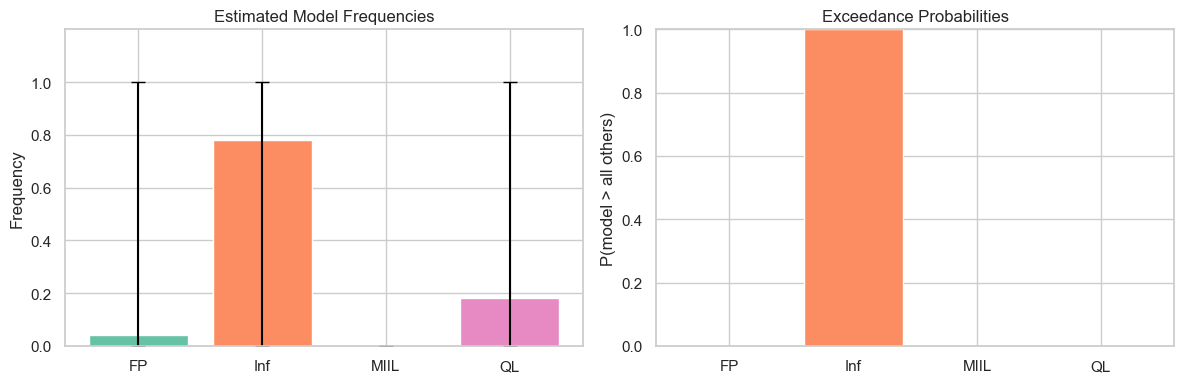

In [16]:
# Convert ELBOs to per-participant posteriors
# Why? We need a matrix of model evidence (ELBOs) for each model/participant pair to perform random-effects Bayesian model comparison.
elbo_matrix, model_names = build_elbo_matrix(fit_result)  
# elbo_matrix: rows = participants, columns = models; each element is the ELBO (evidence lower bound) for that fit

# Estimate RFX model frequencies using a Dirichlet distribution
# Why? Random-effects (RFX) analysis estimates the probability (frequency) with which each model is best across a population, accounting for between-subject heterogeneity.
alphas, xp = estimate_dirichlet_rfx(elbo_matrix)
# alphas: estimated Dirichlet parameters representing model frequencies across the group
# xp: exceedance probabilities (probability that a given model is more frequent than any other)

# Bootstrapping for confidence intervals on model frequency estimates
# Why? Bootstrapping provides an empirical estimate of uncertainty (confidence intervals) around the model frequencies.
mean_alpha, ci_low, ci_high = bootstrap_alphas(elbo_matrix)
model_frequencies = mean_alpha / np.sum(alphas)  # Normalize to get frequencies that sum to 1
mf_ci_low = ci_low / np.sum(alphas)              # Lower bound of CI for model frequency
mf_ci_high = ci_high / np.sum(alphas)            # Upper bound of CI for model frequency

# Report model frequencies and exceedance probabilities
print("\nRFX Model Comparison:")
for name, f, p in zip(model_names, mean_alpha / np.sum(alphas), xp):
    print(f"{name}: model frequencies={f:.2f}, exceedance prob={p:.3f}")

# Plot the results with confidence intervals
# Why? Visualization helps communicate which models are most frequent and how certain we are about this.
plot_rfx_model_comparison_with_ci(model_names, model_frequencies, xp, mf_ci_low, mf_ci_high)

# Sanity checks: Model recovery and parameters recovery

When you build a computational model (like to explain decision-making or behavior), it’s easy to get a good-looking fit to data—but does your model actually make sense?

Two important sanity checks help answer that:
- Parameter Recovery
- Model Recovery

## Parameter recovery – “Can I trust the numbers I’m estimating?”

Suppose your model has parameters (e.g., learning rate, risk aversion, influence weight, etc.). You simulate data with known parameter values, then fit your model and check:

Do the fitted parameters match the ones you used?

### Why does it matter?
If your model can't recover its own parameters reliably, any interpretations you make about “high learning rate” or “low risk aversion” are not trustworthy.

### How does it work?
- Pick a model and generate synthetic data using known parameters.
- Fit the model to that data.
- Compare the true vs recovered parameters.

Qu.9.a) If you plot true vs recovered parameters, what should it look like if the recovery is good? Plot with fake data points of what a good parameter recovery should look like.

Qu.9.b) Use your previously fitted data to do a parameter recovery for each parameter of different models. Start with the QL model. How is your recovery? 

Qu.9.c) What happens if you change n_steps, tolerance, patience?

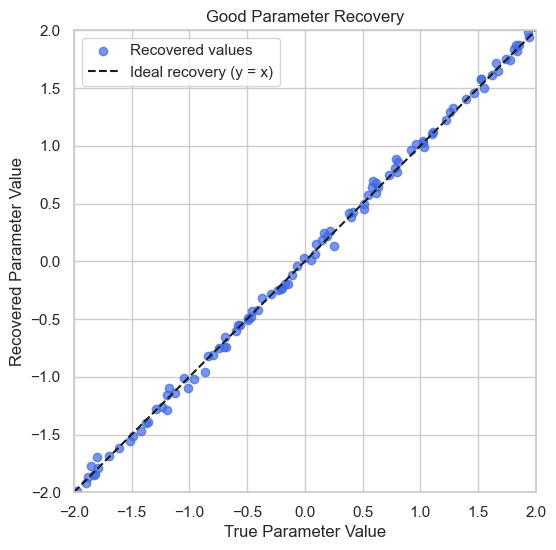

In [17]:
#What a good parameter recovery should look like:
# Generate true parameter values
true_params = np.random.uniform(-2, 2, size=100)

# Generate "recovered" parameter values with small noise
recovered_params = true_params + np.random.normal(0, 0.05, size=true_params.shape)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(true_params, recovered_params, color='royalblue', alpha=0.7, label='Recovered values')
plt.plot([-2, 2], [-2, 2], 'k--', label='Ideal recovery (y = x)')  # Diagonal line
plt.xlabel('True Parameter Value')
plt.ylabel('Recovered Parameter Value')
plt.title('Good Parameter Recovery')
plt.legend()
plt.grid(True)
plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()


Plotting for model: QL
Number of parameters to plot: 2
Plotting parameter 1 for Parameter Recovery for QL: φ (phi)


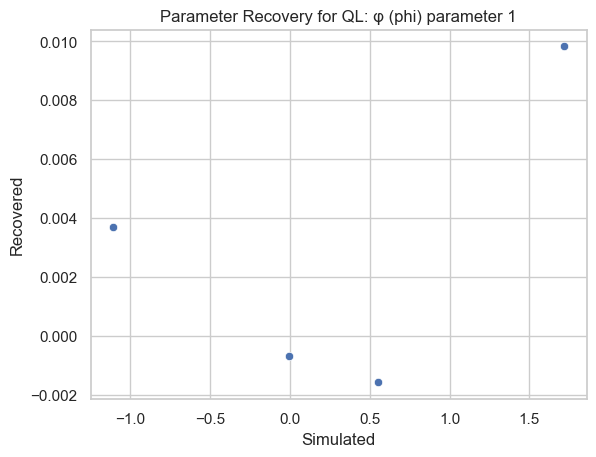

Plotting parameter 2 for Parameter Recovery for QL: φ (phi)


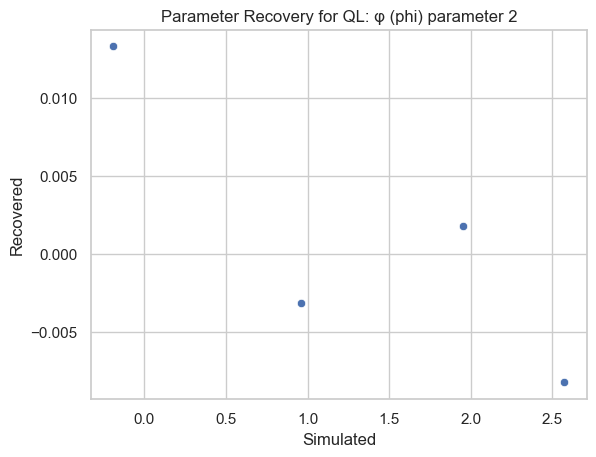

Number of parameters to plot: 1
Plotting parameter 1 for Parameter Recovery for QL: θ (theta)


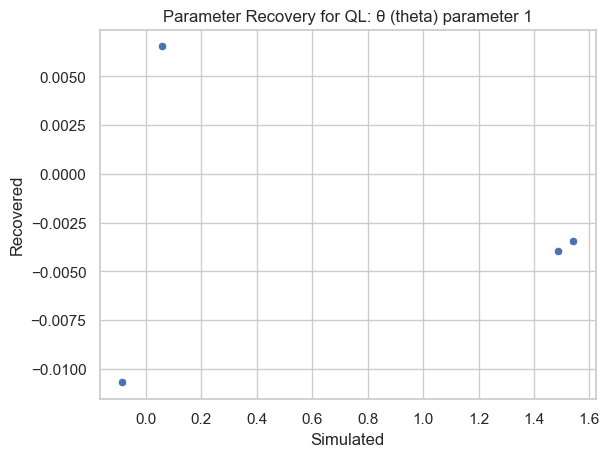

In [18]:
# How to do it with our own simulated data:
# Organize recovery data from results and full_sims_hist
# This function extracts the true (simulated) parameters and the recovered (fitted) parameters for each subject/model.
# Why? Parameter recovery analysis checks whether the model-fitting process can correctly recover the parameters that actually generated the data.
recovery_df = organize_recovery_data(fit_result, full_sims_hist)

# Generate plots to visualize parameter recovery for each simulated model
for mod in recovery_df['sim_model'].unique():
    # For each type of simulated model (e.g., QL, FP, Inf, MIIL)...
    mod_df = recovery_df[recovery_df['sim_model'] == mod]  # Filter for just this model's data

    print(f"Plotting for model: {mod}")

    # Plot true vs recovered φ (phi) parameter
    # Why? A good fit should have recovered values close to the true ones (points should fall along the identity line).
    plot_recovery(mod_df, 'true_phi', 'rec_phi', f'Parameter Recovery for {mod}: φ (phi)')

    # Plot true vs recovered θ (theta) parameter
    plot_recovery(mod_df, 'true_theta', 'rec_theta', f'Parameter Recovery for {mod}: θ (theta)')


Change the guide "guide_fn" in the fit_model() function to None. This will set it to a default guide that is automatically set and optimized. 

Qu.10. What happens to the fit? To the parameter recovery? 

In [ ]:
fit_result = []  # This list will store the outcome of fitting each model to each simulated subject

nb_sbj = 4  # Number of simulated subjects (agent histories) you want to fit models to
# Why? Fitting multiple subjects allows you to evaluate model performance and parameter recovery across a small "population" of simulated agents.

for k in range(nb_sbj):
    # For each simulated subject (agent run)...
    sim_hist = pd.DataFrame(full_sims_hist[k]['history'])  
    # Convert the simulation history to a DataFrame for easier manipulation
    
    # Prepare the data dictionary to be used in model fitting
    # Why? This is the observed sequence of actions and rewards that your models will try to explain/predict.
    data = {
        'agent1_action': sim_hist['agent1_action'],
        'agent2_action': sim_hist['agent2_action'],
        'agent1_reward': sim_hist['agent1_reward']
    }    
    # Loop through each model you want to fit (as defined in pyro_models)
    # Why? This allows you to systematically evaluate how well each model explains the observed behavior.
    for fitted_model_name, (model_fn, guide_fn) in pyro_models.items():
        print((f"Fitting model {fitted_model_name}"))
        
        # Prepare model-specific arguments: different models need different inputs (e.g., number of hidden states, payoff matrices)
        if fitted_model_name == "MIIL":
            in_dict = {'game1': payoff_matrix_CG, 'game2': payoff_matrix_HaS, 'player': 1, 'dim_x': 3}
        elif fitted_model_name == "Inf":
            in_dict = {'game': payoff_matrix_CG, 'player': 1, 'dim_x': 1}
        else:
            in_dict = {'dim_x': 2}

        # Fit the model to the data using the specified model function
        # Why? This step estimates the parameters that make the model's predictions align best with the observed data.
        res = fit_model(
            data=data,
            model_fn=model_fn,
            guide_fn=None,             # If you don't provide a guide, a default is used or the model is deterministic
            in_dict=in_dict,
            n_steps=500,
            tolerance=1e-4,
            verbose=True,
            patience=50
        )

        # Compute performance metrics for the fit: accuracy, likelihood, information criteria, etc.
        # Why? These metrics help you assess how well the model explains the observed data.
        goodness_of_fit = compute_goodness_of_fit(res, data)
        
        # Store all results for later analysis (model comparison, parameter recovery, etc.)
        fit_result.append({
            'simulated_model': full_sims_hist[k]['model'],
            'fitted_model': fitted_model_name,
            'participant_nb': k,
            'model_fit_result': res,
            'goodness_of_fit': goodness_of_fit
        })    

        # Print out model fit metrics for this run
        accuracy = goodness_of_fit['accuracy']
        print(f"Model {fitted_model_name} accuracy: {accuracy:.2f}")

        balanced_accuracy = goodness_of_fit['balanced_accuracy']
        print(f"Model {fitted_model_name} balanced accuracy: {balanced_accuracy:.2f}")

        log_likelihood = goodness_of_fit['log_likelihood']
        print(f"Model {fitted_model_name} log likelihood: {log_likelihood:.2f}")

        aic = goodness_of_fit['aic']
        print(f"Model {fitted_model_name} AIC: {aic:.2f}")

        bic = goodness_of_fit['bic']
        print(f"Model {fitted_model_name} BIC: {bic:.2f}")

        

Fitting model QL
[0] ELBO: -288.50, Best: -288.50
Early stopping at step 64: no improvement in 50 steps.
Best parameters found:{'AutoMultivariateNormal.loc': tensor([-0.5906, -1.1758, -0.8911]), 'AutoMultivariateNormal.scale': tensor([0.1014, 0.1014, 0.1014]), 'AutoMultivariateNormal.scale_tril': tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00],
        [-2.6425e-03,  1.0000e+00,  0.0000e+00],
        [-2.7633e-03,  7.8339e-04,  1.0000e+00]])}
Model QL accuracy: 0.08
Model QL balanced accuracy: 0.50
Model QL log likelihood: -300.33
Model QL AIC: 606.66
Model QL BIC: 617.77
Fitting model FP
[0] ELBO: -234.04, Best: -234.04
Early stopping at step 65: no improvement in 50 steps.
Best parameters found:{'AutoMultivariateNormal.loc': tensor([-1.0466, -0.1353, -0.9538]), 'AutoMultivariateNormal.scale': tensor([0.1015, 0.1015, 0.1015]), 'AutoMultivariateNormal.scale_tril': tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00],
        [-5.4944e-03,  1.0000e+00,  0.0000e+00],
        [-4.1911e-03,  4.

Plotting for model: QL
Number of parameters to plot: 2
Plotting parameter 1 for Parameter Recovery for QL: φ (phi)


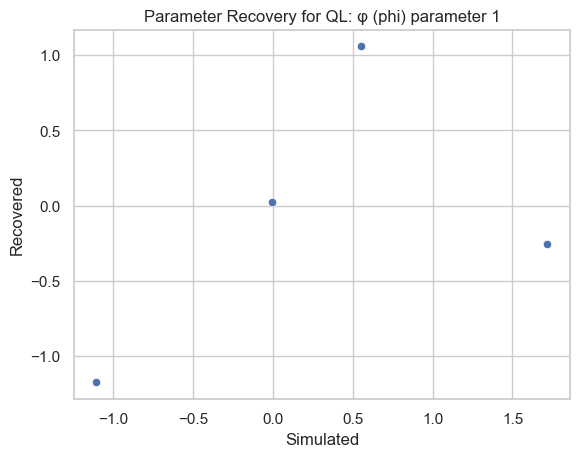

Plotting parameter 2 for Parameter Recovery for QL: φ (phi)


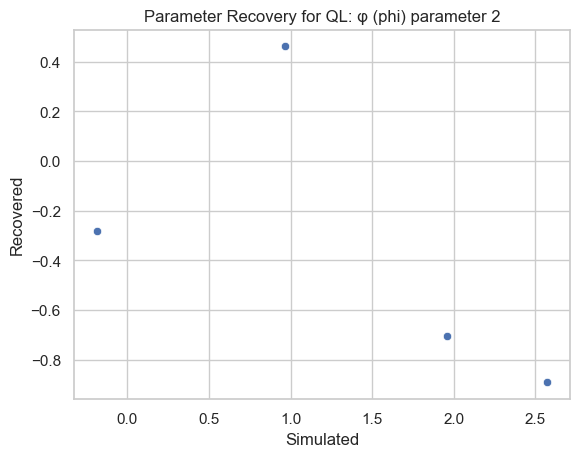

Number of parameters to plot: 1
Plotting parameter 1 for Parameter Recovery for QL: θ (theta)


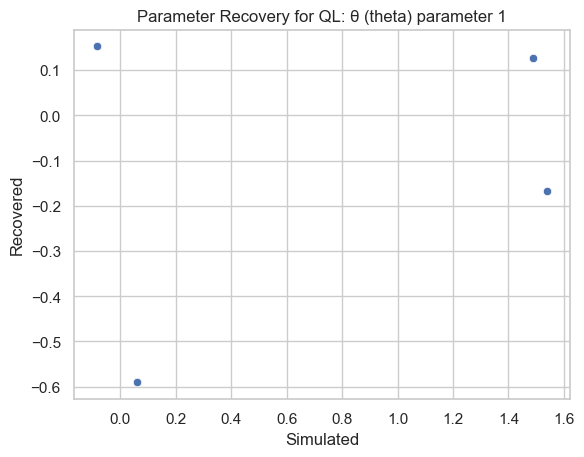

In [21]:
# How to do it with our own simulated data:
# Organize recovery data from results and full_sims_hist
# This function extracts the true (simulated) parameters and the recovered (fitted) parameters for each subject/model.
# Why? Parameter recovery analysis checks whether the model-fitting process can correctly recover the parameters that actually generated the data.
recovery_df = organize_recovery_data(fit_result, full_sims_hist)

# Generate plots to visualize parameter recovery for each simulated model
for mod in recovery_df['sim_model'].unique():
    # For each type of simulated model (e.g., QL, FP, Inf, MIIL)...
    mod_df = recovery_df[recovery_df['sim_model'] == mod]  # Filter for just this model's data

    print(f"Plotting for model: {mod}")

    # Plot true vs recovered φ (phi) parameter
    # Why? A good fit should have recovered values close to the true ones (points should fall along the identity line).
    plot_recovery(mod_df, 'true_phi', 'rec_phi', f'Parameter Recovery for {mod}: φ (phi)')

    # Plot true vs recovered θ (theta) parameter
    plot_recovery(mod_df, 'true_theta', 'rec_theta', f'Parameter Recovery for {mod}: θ (theta)')


## Model recovery – “Can I tell models apart?”

Suppose you have two or more competing models. You simulate data using one of them, and then try to fit all the models to this simulated data. If you’re doing it right, the correct model (the one that generated the data) should be the one you recover.

### Why does it matter?
If your model comparison can't identify the right model when you already know the answer, you shouldn't trust it on real data...

### How does it work?
- Pick several models.
- Simulate behavior from each model using known parameters.
- Fit all models to that simulated data.
- See if you correctly identify the model that generated the data.
- If not → data generated by your models is too similar, or the fitting procedure is flawed.


To represent a model recovery, we usually plot the confusion matrix showing how often the right model is chosen. For each simulated model, we plot the estimated frequencies after fitting all models. 

Qu.11.a) If we have 4 models (e.g. the QL, FP, Influence and MIIL models), how would this matrix look like if the model recovery is good? Plot a dummy recovery matrix that would represent a good model recovery.

Qu.11.b) Plot a dummy matrix that would represent a bad model recovery. What is wrong with your matrix? What would it mean in terms of your fitting procedure or models? 

Qu.12 Think about what you can possibly do to improve model recovery.

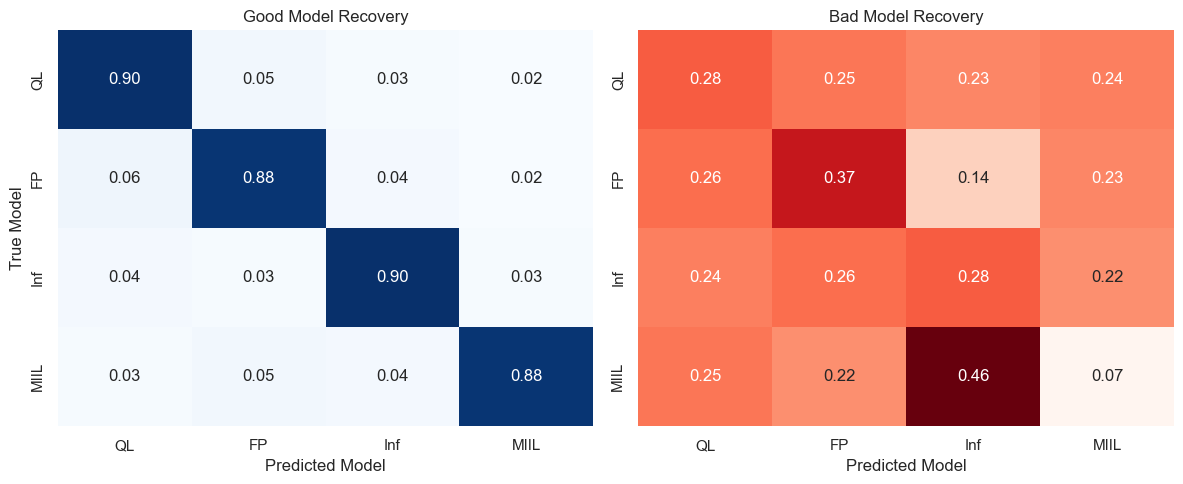

In [20]:
# Set up dummy 4x4 confusion matrix
# Good recovery matrix
good_matrix = np.array([
    [0.90, 0.05, 0.03, 0.02],
    [0.06, 0.88, 0.04, 0.02],
    [0.04, 0.03, 0.90, 0.03],
    [0.03, 0.05, 0.04, 0.88]
])

# Bad recovery matrix (near chance level performance for some models, misclassification for others)
bad_matrix = np.array([
    [0.28, 0.25, 0.23, 0.24],
    [0.26, 0.37, 0.14, 0.23],
    [0.24, 0.26, 0.28, 0.22],
    [0.25, 0.22, 0.46, 0.07]
])

# Model names
model_labels = ['QL', 'FP', 'Inf', 'MIIL']

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Good recovery plot
sns.heatmap(good_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=model_labels, yticklabels=model_labels, cbar=False, ax=axes[0])
axes[0].set_title("Good Model Recovery")
axes[0].set_xlabel("Predicted Model")
axes[0].set_ylabel("True Model")

# Bad recovery plot
sns.heatmap(bad_matrix, annot=True, fmt=".2f", cmap="Reds",
            xticklabels=model_labels, yticklabels=model_labels, cbar=False, ax=axes[1])
axes[1].set_title("Bad Model Recovery")
axes[1].set_xlabel("Predicted Model")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

Ideally, we would like to perform a model recovery on our simulated data. However, the fitting procedure will take a very long time. It would need parallelization. So this will be for another time.

End of session.